# `1. Latar Belakang`

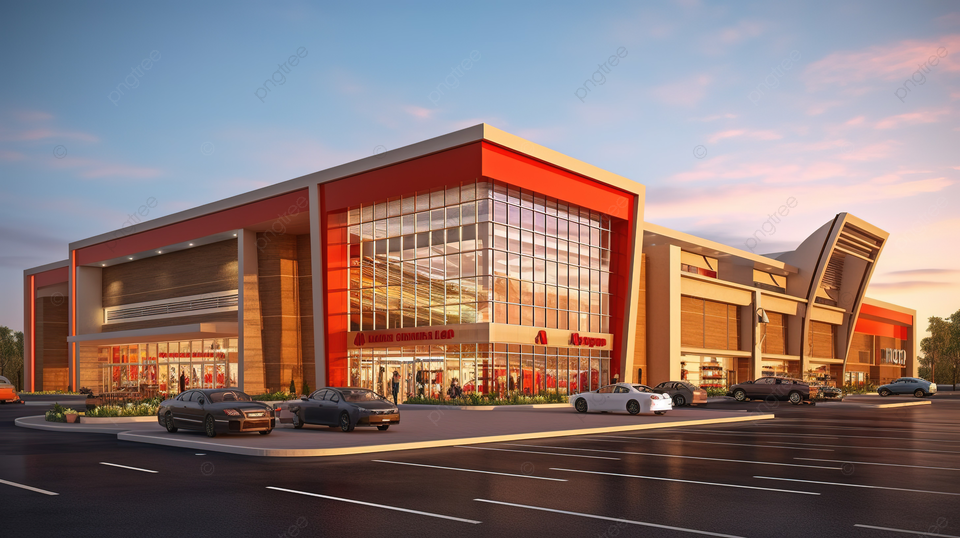

**Sumber**:  
[**Picture**](https://pngtree.com/freebackground/stunning-3d-render-of-a-modern-supermarket-building_13272823.html)

Freshmart adalah jaringan supermarket kelas menengah yang menyediakan berbagai macam produk, mulai dari kebutuhan pokok seperti buah dan sayuran hingga barang premium seperti wine, daging, dan produk emas. Dengan fokus pada kualitas dan variasi, perusahaan ini telah berhasil menarik berbagai segmen pelanggan, termasuk keluarga, profesional, dan individu dengan pendapatan tinggi. Namun, dalam beberapa tahun terakhir, Freshmart menghadapi persaingan yang semakin ketat, baik dari ritel lokal maupun platform belanja online, yang mulai mengancam pangsa pasarnya.

Meskipun beberapa kategori produk menunjukkan performa yang baik, perusahaan masih menghadapi tantangan untuk mengidentifikasi produk dengan kontribusi terbesar terhadap pendapatan dan memaksimalkan potensinya. Selain itu, pemahaman yang lebih dalam terhadap perilaku pelanggan sangat dibutuhkan untuk menciptakan strategi segmentasi yang lebih efektif. Tantangan lain yang dihadapi adalah bagaimana meningkatkan keterlibatan pelanggan, dengan fokus pada mempertahankan pelanggan setia serta mengaktifkan kembali pelanggan yang mulai jarang berbelanja.

Untuk menjawab tantangan ini, Freshmart menyadari pentingnya memanfaatkan data pelanggan secara strategis. Melalui analisis mendalam terhadap perilaku belanja pelanggan dan kinerja produk, perusahaan bertujuan untuk mengidentifikasi produk terbaik yang dapat mendorong peningkatan pendapatan, memahami kebiasaan pelanggan untuk menciptakan segmentasi yang actionable, serta mengembangkan strategi pemasaran yang efektif guna meningkatkan loyalitas, mendorong pembelian berulang, dan menarik kembali pelanggan yang tidak aktif.

# `2. Pernyataan Masalah`

**1. Mengidentifikasi pelanggan bernilai tinggi dan pelanggan potensial yang dapat ditingkatkan kontribusinya.**

**2. Menentukan produk yang paling diminati oleh segmen pelanggan tertentu untuk kampanye pemasaran yang lebih efektif.**

**3. Meningkatkan loyalitas pelanggan berdasarkan segmentasi berbasis data.**

# `3. Data Understanding`

Untuk menjawab pertanyaan di atas, kita akan menganalisa data customer yang sudah dikumpulkan oleh perusahaan.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, spearmanr 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

#modul
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import f_oneway, shapiro, kruskal, ttest_ind

Dataset berupa data Supermarket Customer, dimana pada dataset terdapat 27 kolom yaitu:

People
* `ID`: Customer’s unique identifier
* `Year_Birth`: Customer’s birth year
* `Education`: Customer’s education level
* `Marital_Status`: Customer’s marital status
* `Income`: Customer’s yearly household income
* `Kidhome`: Number of children in customer’s household
* `Teenhome`: Number of teenagers in customer’s household
* `Dt_Customer`: Date of customer’s enrollment with the company
* `Recency`: Number of days since customer’s last purchase
* `Complain`: 1 if customer complained in the last 2 years, 0 otherwise

Products
* `MntWines`: Amount spent on wine in last 2 years
* `MntFruits`: Amount spent on fruits in last 2 years
* `MntMeatProducts`: Amount spent on meat in last 2 years
* `MntFishProducts`: Amount spent on fish in last 2 years
* `MntSweetProducts`: Amount spent on sweets in last 2 years
* `MntGoldProds`: Amount spent on gold in last 2 years


Promotion
* `NumDealsPurchases`: Number of purchases made with a discount
* `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* `AcceptedCmp4:` 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
* `NumWebPurchases`: Number of purchases made through the company’s web site
* `NumCatalogPurchases`: Number of purchases made using a catalogue
* `NumStorePurchases`: Number of purchases made directly in stores
* `NumWebVisitsMonth`: Number of visits to company’s web site in the last month

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

Berikut dipaparkan dataset dari Supermarket Customer:

In [11]:
df = pd.read_csv('Supermarket Customers.csv', delimiter='\t')
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

### Melihat tipe data untuk setiap column

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Pengecekan data unique untuk setiap kolom beserta jumlahnya dengan tabel

In [15]:
pd.set_option('display.max_colwidth', None)
listItem = []
for x in df.columns :
    listItem.append([x, df[x].nunique(), df[x].unique()])

Desc_Table = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
Desc_Table

Column Name  Number of Unique  \
0                    ID              2240   
1            Year_Birth                59   
2             Education                 5   
3        Marital_Status                 8   
4                Income              1974   
5               Kidhome                 3   
6              Teenhome                 3   
7           Dt_Customer               663   
8               Recency               100   
9              MntWines               776   
10            MntFruits               158   
11      MntMeatProducts               558   
12      MntFishProducts               182   
13     MntSweetProducts               177   
14         MntGoldProds               213   
15    NumDealsPurchases                15   
16      NumWebPurchases                15   
17  NumCatalogPurchases                14   
18    NumStorePurchases                14   
19    NumWebVisitsMonth                16   
20         AcceptedCmp3                 2   
21         AcceptedCmp4                 2   
22         AcceptedCmp5                 2   
23         AcceptedCmp1                 2   
24         AcceptedCmp2                 2   
25             Complain                 2   
26             Response                 2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Unique Sample  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]  
1                                                                                                                                                                                                                                                                                                                                      

### Pengecekan data kosong

In [17]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

### Pengecekan data numerikal dengan nilai nol (0)

In [19]:
zero_values = df[(df['ID'] == 0) | (df['Year_Birth'] == 0) | (df['Income'] == 0)]
zero_values

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
214   0        1985  Graduation        Married  70951.0        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
214  04-05-2013       66       239         10              554   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
214              254                87            54                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
214                3                    4                  9   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
214                  1             0             0             0   

     AcceptedCmp1  AcceptedCmp2  Complain  Response  
214             0             0         0         0

### Pengecekan data duplikat

In [21]:
duplicates = df[df.duplicated()]
duplicates

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response]
Index: []

### Insight Keseluruhan

Secara umum, kita bisa melihat bahwa:
* dataset Supermarket Customer memiliki 27 kolom dan 2240 baris
* dataset yang memiliki missing value ada pada kolom `Income` sebanyak 24
* kolom `Year_Birth` dapat diintepretasikan sebgai umur Customer
* terdapat 1 data pada kolom `ID` yang berdefinisi 0
* dataset pada kolom `Dt_Customer` merupakan object sehingga perlu diubah menjadi datetime
* tidak terdapat data duplikat pada dataset
* pada kolom `Marital_Status` terdapat beberapa unique value yang harus difilter

# `4. Data Cleaning`

### Perubahan `Year_Birth` menjadi umur atau `Age`

In [25]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
latest_date = df['Dt_Customer'].max() + pd.Timedelta(days=1)
latest_year = latest_date.year
df['Age'] = latest_year - df['Year_Birth']
df.drop(columns=['Year_Birth'], inplace=True)

df.head()

ID   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0  5524  Graduation         Single  58138.0        0         0  2012-09-04   
1  2174  Graduation         Single  46344.0        1         1  2014-03-08   
2  4141  Graduation       Together  71613.0        0         0  2013-08-21   
3  6182  Graduation       Together  26646.0        1         0  2014-02-10   
4  5324         PhD        Married  58293.0        1         0  2014-01-19   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Age  
0   57  
1   60  
2   49  
3   30  
4   33

### Memfilter umur anomali pada kolom `Age`

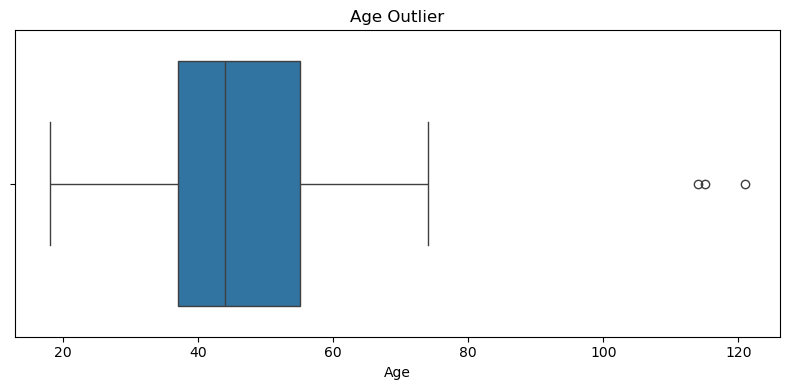

In [27]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x=df['Age'], ax=ax)
ax.set_title('Age Outlier')
plt.tight_layout()
plt.show()

In [28]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 80)]

print(df['Age'].unique())

[57 60 49 30 33 47 43 29 40 64 31 38 55 62 27 68 34 65 32 35 63 45 28 25
 51 44 41 71 39 18 46 50 37 36 59 48 26 66 56 42 54 69 23 52 61 53 58 22
 24 67 21 20 73 70 19 74]


### Mengatasi mising value `Income` pada dataset

Seperti yang sudah dijelaskan sebelumnya, terdapat 24 missing value pada kolom `Income`. Metode yang digunakan adalah dengan mengisi kolom `Income` yang kosong menggunakan kolom `Education` & `Age`

In [31]:
missing_income = df[df['Income'].isna()]
missing_income

ID   Education Marital_Status  Income  Kidhome  Teenhome Dt_Customer  \
10     1994  Graduation        Married     NaN        1         0  2013-11-15   
27     5255  Graduation         Single     NaN        1         0  2013-02-20   
43     7281         PhD         Single     NaN        0         0  2013-11-05   
48     7244  Graduation         Single     NaN        2         1  2014-01-01   
58     8557  Graduation         Single     NaN        1         0  2013-06-17   
71    10629    2n Cycle        Married     NaN        1         0  2012-09-14   
90     8996         PhD        Married     NaN        2         1  2012-11-19   
91     9235  Graduation         Single     NaN        1         1  2014-05-27   
92     5798      Master       Together     NaN        0         0  2013-11-23   
128    8268         PhD        Married     NaN        0         1  2013-07-11   
133    1295  Graduation        Married     NaN        0         1  2013-08-11   
312    2437  Graduation        Married     NaN        0         0  2013-06-03   
319    2863  Graduation         Single     NaN        1         2  2013-08-23   
1379  10475      Master       Together     NaN        0         1  2013-04-01   
1382   2902  Graduation       Together     NaN        1         1  2012-09-03   
1383   4345    2n Cycle         Single     NaN        1         1  2014-01-12   
1386   3769         PhD       Together     NaN        1         0  2014-03-02   
2059   7187      Master       Together     NaN        1         1  2013-05-18   
2061   1612         PhD         Single     NaN        1         0  2013-05-31   
2078   5079  Graduation        Married     NaN        1         1  2013-03-03   
2079  10339      Master       Together     NaN        0         1  2013-06-23   
2081   3117  Graduation         Single     NaN        0         1  2013-10-18   
2084   5250      Master          Widow     NaN        0         0  2013-10-30   
2228   8720    2n Cycle       Together     NaN        0         0  2012-08-12   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
10         11         5          5                6                0   
27         19         5          1                3                3   
43         80        81         11               50                3   
48         96        48          5               48                6   
58         57        11          3               22                2   
71         25        25          3               43               17   
90          4       230         42              192               49   
91         45         7          0                8                2   
92         87       445         37              359               98   
128        23       352          0               27               10   
133        96       231         65              196               38   
312        69       861        138              461               60   
319        67       738         20              172               52   
1379       39       187          5               65               26   
1382       87        19          4               12                2   
1383       49         5          1                9                2   
1386       17        25          1               13                0   
2059       52       375         42               48               94   
2061       82        23          0               15                0   
2078       82        71          1               16                0   
2079       83       161          0               22                0   
2081       95       264          0               21               12   
2084       75       532        126              490              164   
2228       53        32          2             1607               12   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
10                   2             1                  1                1   
27                 263        

In [32]:
fill_missing = df.groupby(['Education', 'Age'])['Income'].median()

df['Income'] = df.apply(
    lambda row: fill_missing[row['Education'], row['Age']] 
    if np.isnan(row['Income']) else row['Income'], axis=1
)

print("Remaining missing values in Income:", df['Income'].isnull().sum())

Remaining missing values in Income: 0


### Mengatasi unique value dari `Marital_Status`

In [34]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Together': 'Married',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single'
})

df['Marital_Status'].value_counts()

Marital_Status
Married     1443
Single       486
Divorced     231
Widow         77
Name: count, dtype: int64

### Pengubahan Tipe Data `Dt_Customer` menjadi Datetime

In [36]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
Index: 2237 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2237 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 35.0 KB


### Mengatasi unique value kolom `Education`

In [38]:
df['Education'] = df['Education'].replace('2n Cycle', 'Master')
print(df['Education'].value_counts())

Education
Graduation    1127
Master         571
PhD            485
Basic           54
Name: count, dtype: int64


### Mengubah User `ID` yang nol (0)

In [40]:
last_id_num = df['ID'].max()
df['ID'] = df['ID'].replace(0, last_id_num + 1)

df.loc[df['ID'] == 0]

Empty DataFrame
Columns: [ID, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Age]
Index: []

### Kondisi dataset setelah terfilter

In [42]:
df

ID   Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524  Graduation         Single  58138.0        0         0   
1      2174  Graduation         Single  46344.0        1         1   
2      4141  Graduation        Married  71613.0        0         0   
3      6182  Graduation        Married  26646.0        1         0   
4      5324         PhD        Married  58293.0        1         0   
...     ...         ...            ...      ...      ...       ...   
2235  10870  Graduation        Married  61223.0        0         1   
2236   4001         PhD        Married  64014.0        2         1   
2237   7270  Graduation       Divorced  56981.0        0         0   
2238   8235      Master        Married  69245.0        0         1   
2239   9405         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58       635         88              546   
1     2014-03-08       38        11          1                6   
2     2013-08-21       26       426         49              127   
3     2014-02-10       26        11          4               20   
4     2014-01-19       94       173         43              118   
...          ...      ...       ...        ...              ...   
2235  2013-06-13       46       709         43              182   
2236  2014-06-10       56       406          0               30   
2237  2014-01-25       91       908         48              217   
2238  2014-01-24        8       428         30              214   
2239  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0           

# `5. Data Analysis`

Setelah menyelesaikan proses data cleaning, kita sekarang siap untuk melanjutkan ke tahap analisis guna memahami perilaku pelanggan supermarket pada Freshmart. Tujuan dari analisis ini adalah untuk mengidentifikasi perbedaan utama di antara segmen pelanggan serta memberikan rekomendasi yang dapat mendukung pengambilan keputusan strategis.

Dataset yang digunakan dalam analisis ini berisi 2.237 data pelanggan, mencakup informasi tentang riwayat transaksi, demografi, serta tingkat respons terhadap kampanye pemasaran. Dengan data ini, kami bertujuan menjawab tiga pertanyaan utama yang menjadi fokus analisis

## `5.1 Descriptive Analysis`

Analisis deskriptif memberikan gambaran umum kumpulan data dengan merangkum fitur-fitur utama, membantu memahami karakteristik umum pelanggan supermarket. Berikut merupakan deskripsi data numerical dan categorical:

In [47]:
display(df.describe(), df.describe(include='object'))

ID         Income      Kidhome     Teenhome  \
count   2237.000000    2237.000000  2237.000000  2237.000000   
mean    5595.729549   52212.529057     0.444345     0.506482   
min        1.000000    1730.000000     0.000000     0.000000   
25%     2831.000000   35441.000000     0.000000     0.000000   
50%     5462.000000   51369.000000     0.000000     0.000000   
75%     8430.000000   68316.000000     1.000000     1.000000   
max    11192.000000  666666.000000     2.000000     2.000000   
std     3245.122867   25065.155065     0.538467     0.544593   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2237  2237.000000  2237.000000  2237.000000   
mean   2013-07-10 05:01:54.260169728    49.104604   303.995530    26.270451   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    24.000000     1.000000   
50%              2013-07-08 00:00:00    49.000000   174.000000     8.000000   
75%              2013-12-30 00:00:00    74.000000   504.000000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.956073   336.574382    39.715972   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count      2237.000000      2237.000000       2237.000000   2237.000000   
mean        166.916853        37.523022         27.068842     43.968708   
min           0.000000         0.000000          0.000000      0.000000   
25%          16.000000         3.000000          1.000000      9.000000   
50%          67.000000        12.000000          8.000000     24.000000   
75%         232.000000        50.000000         33.000000     56.000000   
max        1725.000000       259.000000        263.000000    362.000000   
std         225.661158        54.639909         41.293949     52.054318   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2237.000000      2237.000000          2237.000000   
mean            2.326777         4.087170             2.662494   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   
std             1.932923         2.779461             2.923456   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2237.000000        2237.000000   2237.000000   2237.000000   
mean            5.794367           5.319177      0.072865      0.074654   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   
std             3.250940           2.426386      0.259974      0.262890   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2237.000000   2237.000000   2237.000000  2237.000000  2237.000000   
mean       0.072418      0.064372      0.013411     0.008941     0.149307   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   
std        0.259237      0.245469      0.115052     0.094152     0.356471   

               Age  
count  2237.000000  
mean     45.098346  
min      18.000000  
25%

Education Marital_Status
count         2237           2237
unique           4              4
top     Graduation        Married
freq          1127           1443

## `5.2 Exploratory Data Analysis (EDA)`

### Melihat distribusi data demography Customer

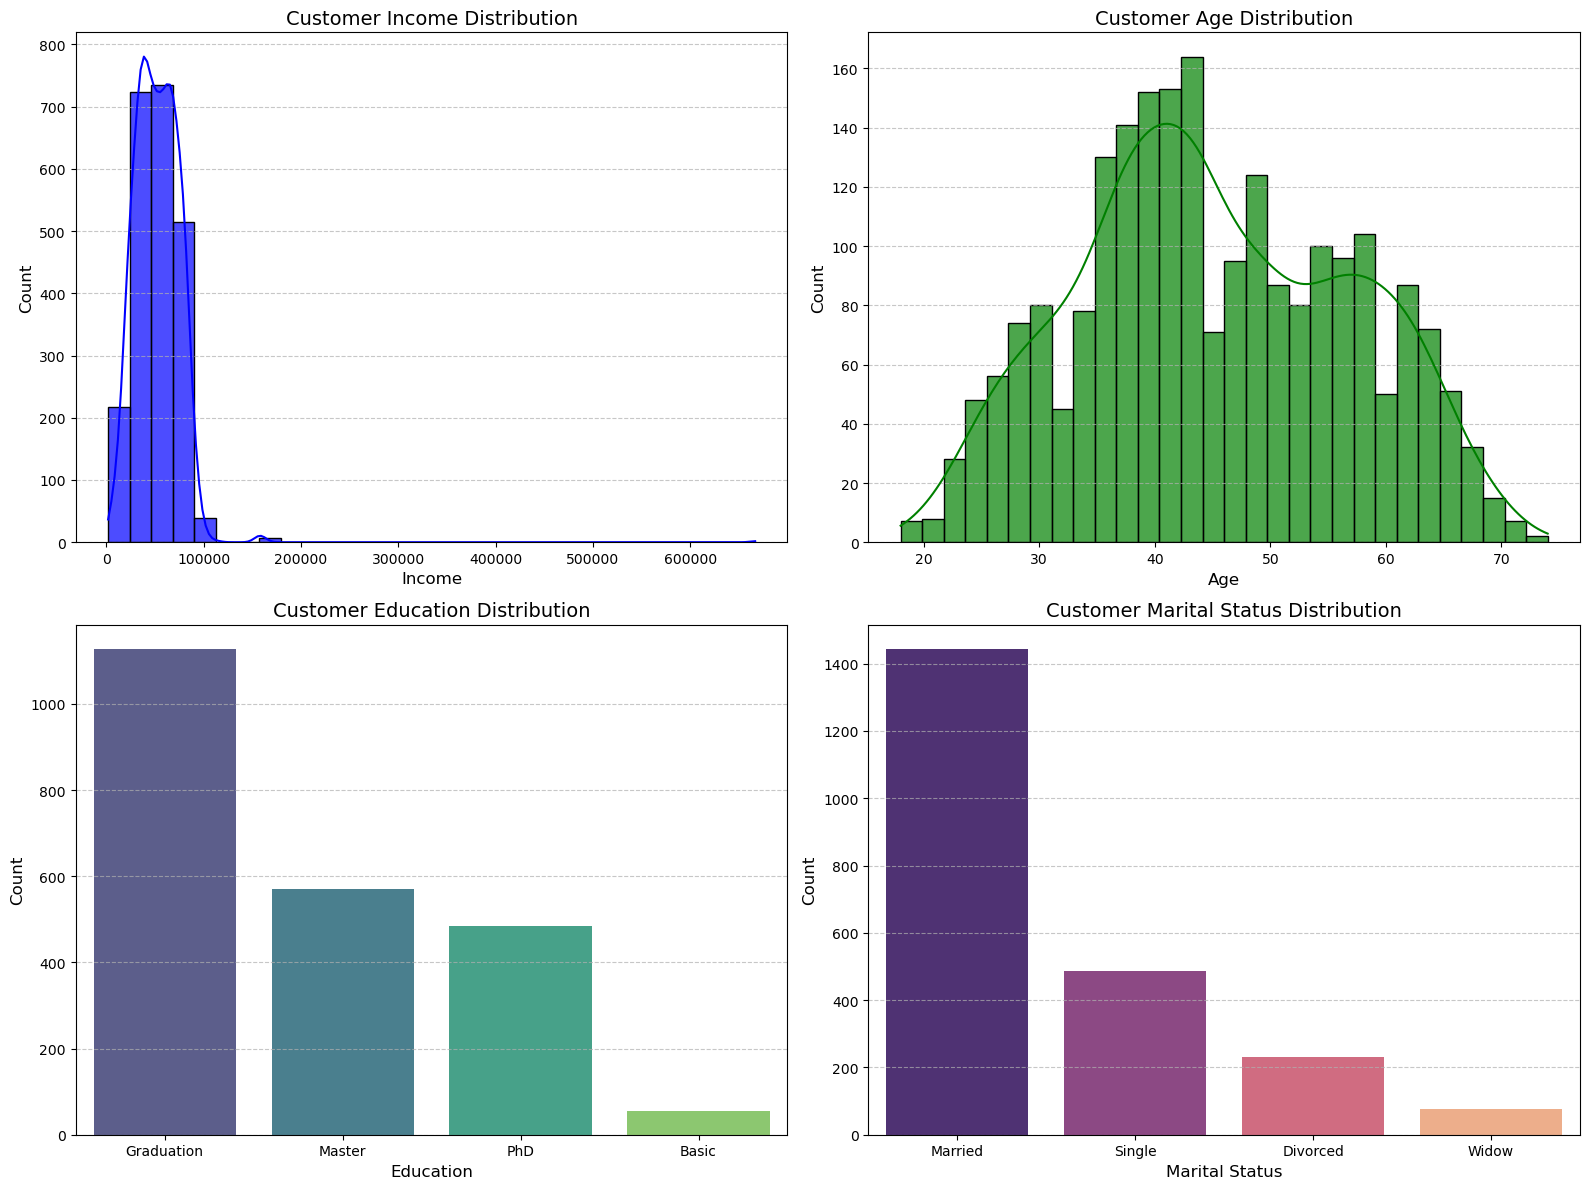

In [50]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.histplot(df['Income'], kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Customer Income Distribution', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 2)
sns.histplot(df['Age'], kde=True, bins=30, color='green', alpha=0.7)
plt.title('Customer Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 3)
education_order = df['Education'].value_counts().index  # Sort by count
sns.countplot(x='Education', data=df, order=education_order, palette='viridis', alpha=0.9)
plt.title('Customer Education Distribution', fontsize=14)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 4)
marital_status_order = df['Marital_Status'].value_counts().index  # Sort by count
sns.countplot(x='Marital_Status', data=df, order=marital_status_order, palette='magma', alpha=0.9)
plt.title('Customer Marital Status Distribution', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Insight

**1. Distribusi data Income:**

* Sebagian besar pelanggan memiliki pendapatan di bawah 100.000.
* Distribusi sangat miring ke kanan, menunjukkan ada beberapa outlier dengan pendapatan yang jauh lebih tinggi.

**2. Distribusi data Age:**

* Sebagian besar pelanggan berada di rentang usia 30 hingga 60 tahun, dengan puncak sekitar usia 40 - 45 tahun.
* Data menunjukkan bahwa pelanggan cenderung berada di kelompok usia produktif.

**3. Distribusi data Education:**

* Mayoritas pelanggan memiliki tingkat pendidikan Graduation, diikuti oleh PhD dan Master.
* Pelanggan dengan tingkat pendidikan dasar (Basic) sangat sedikit.

**4. Distribusi data Marital_Status:**

* Sebagian besar pelanggan berstatus Married, diikuti oleh Single.
* Pelanggan dengan status Divorced dan Widow lebih sedikit dibandingkan kategori lainnya.

### Melihat korelasi data numerical

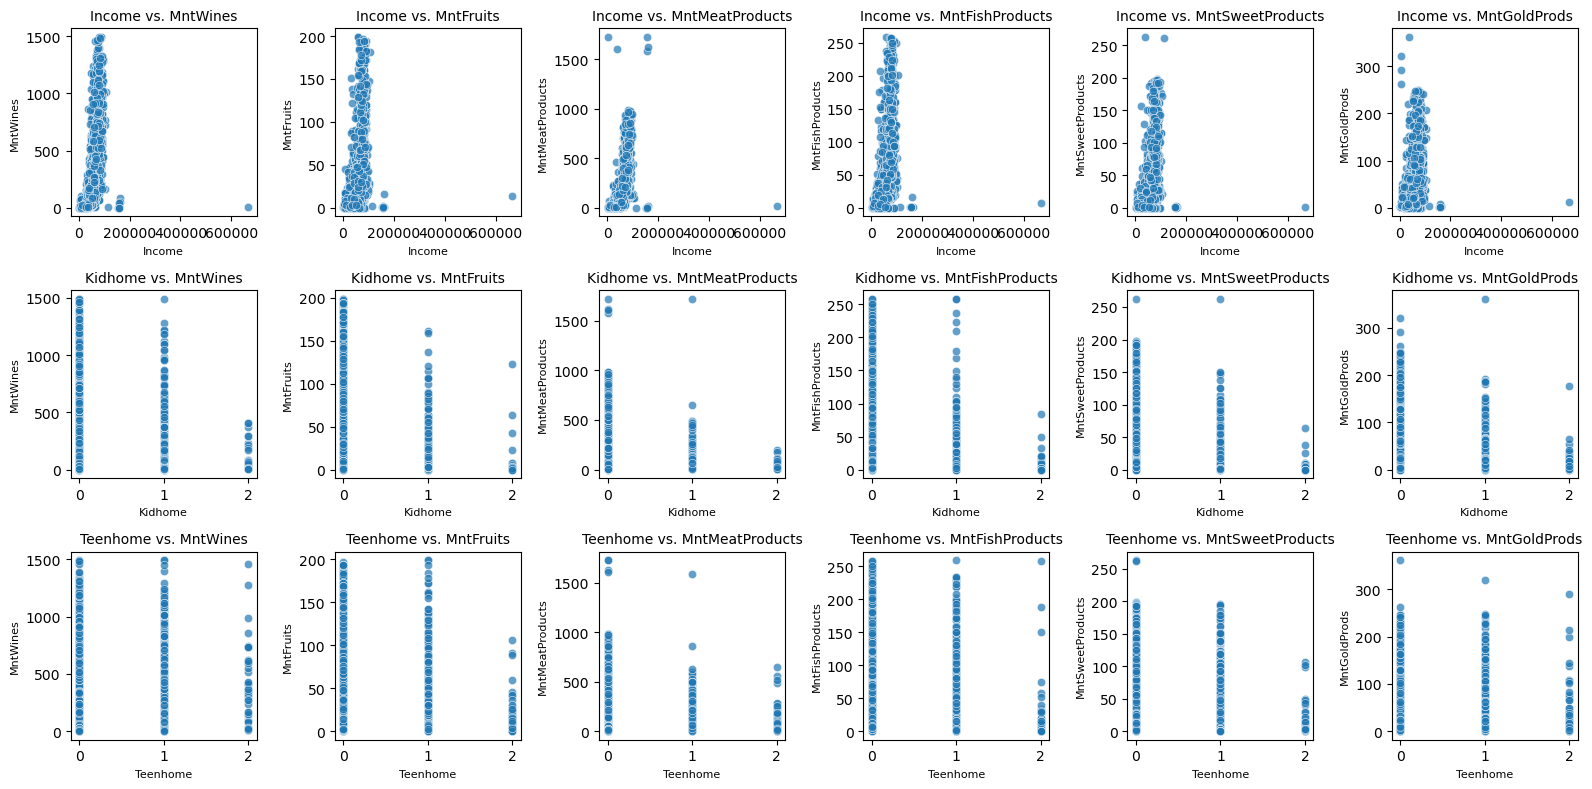

In [53]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
key_demographics = ['Income', 'Kidhome', 'Teenhome']

plt.figure(figsize=(16, 8))
plot_number = 1

for demo_col in key_demographics:
    for product_col in product_columns:
        plt.subplot(len(key_demographics), len(product_columns), plot_number)
        sns.scatterplot(x=df[demo_col], y=df[product_col], alpha=0.7)
        plt.title(f'{demo_col} vs. {product_col}', fontsize=10)
        plt.xlabel(demo_col, fontsize=8)
        plt.ylabel(product_col, fontsize=8)
        plot_number += 1

plt.tight_layout()
plt.show()

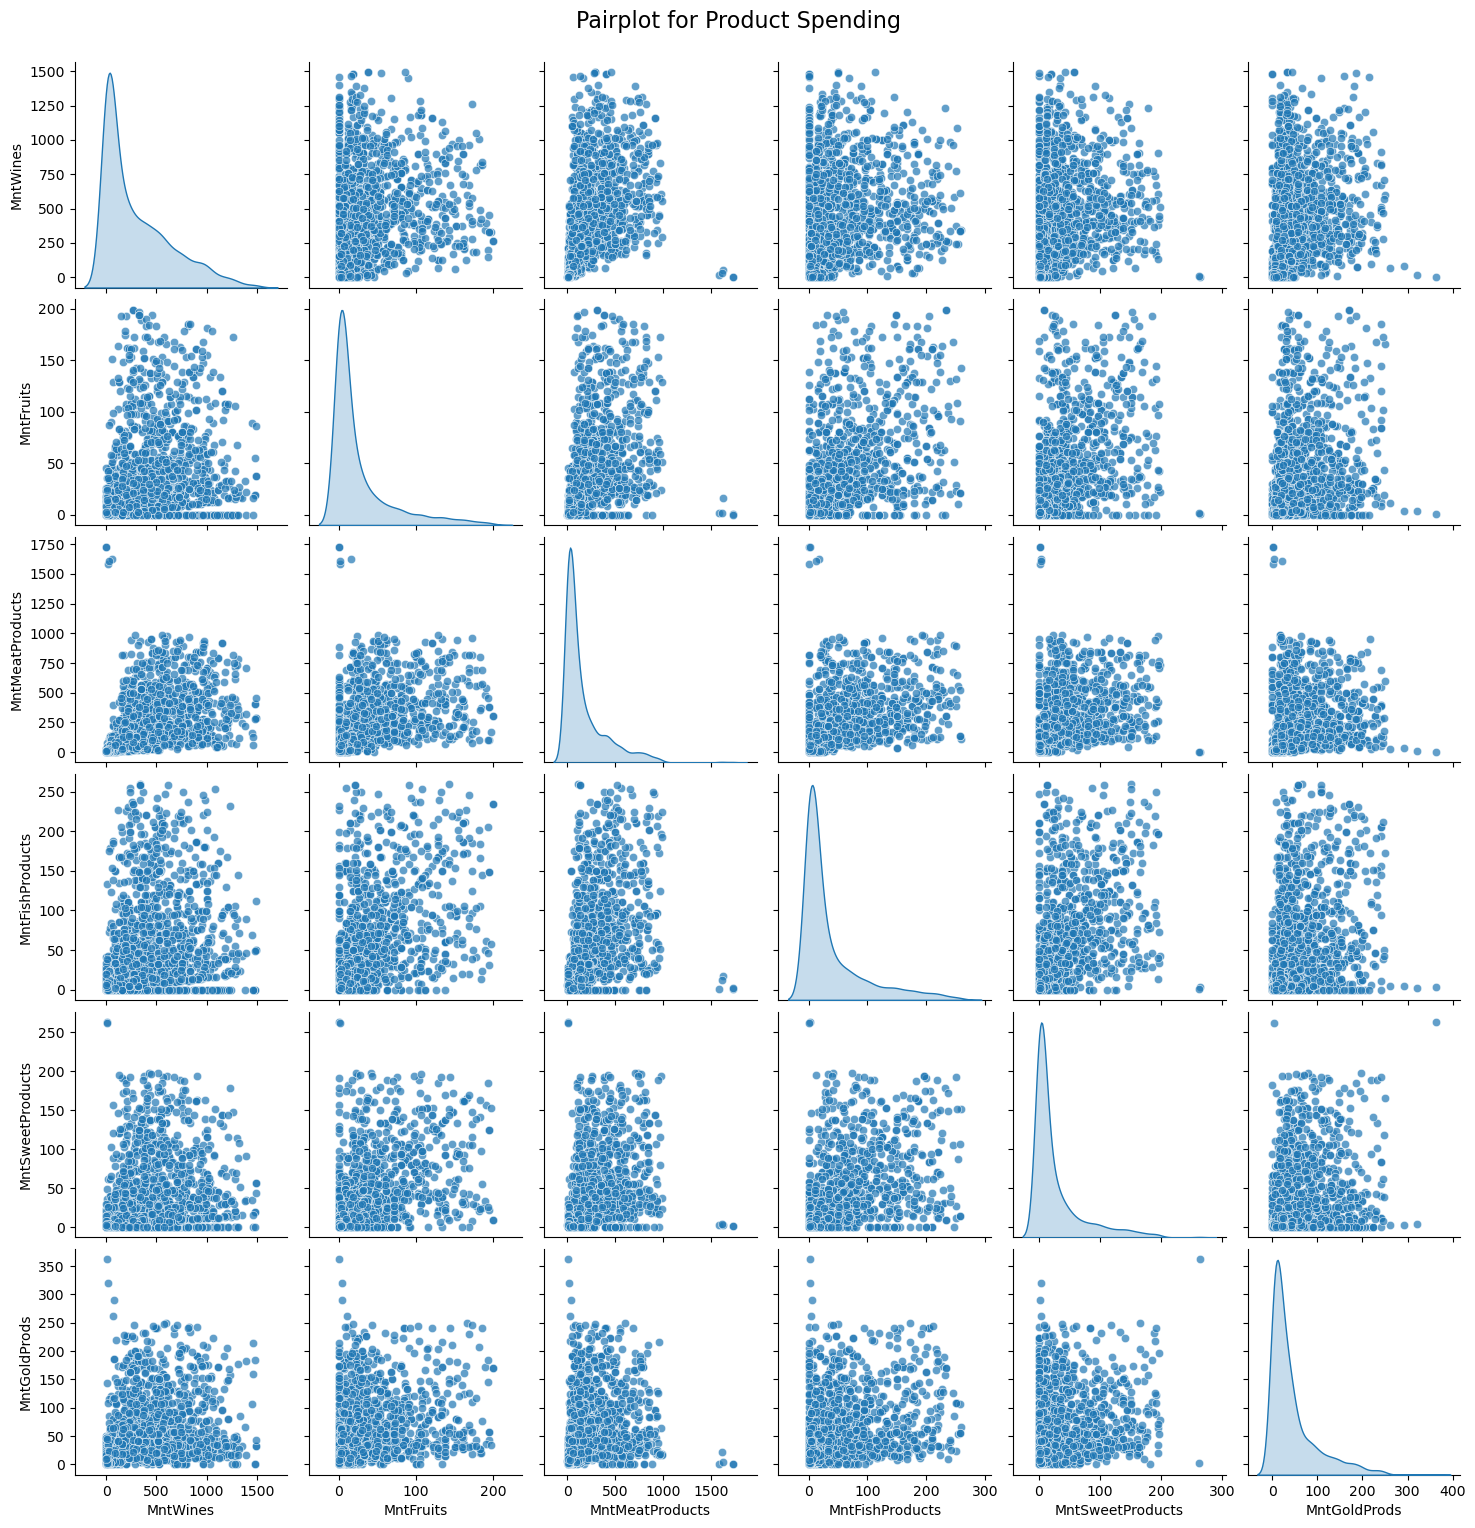

In [54]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

sns.pairplot(df[product_columns], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle("Pairplot for Product Spending", y=1.02, fontsize=16)
plt.show()

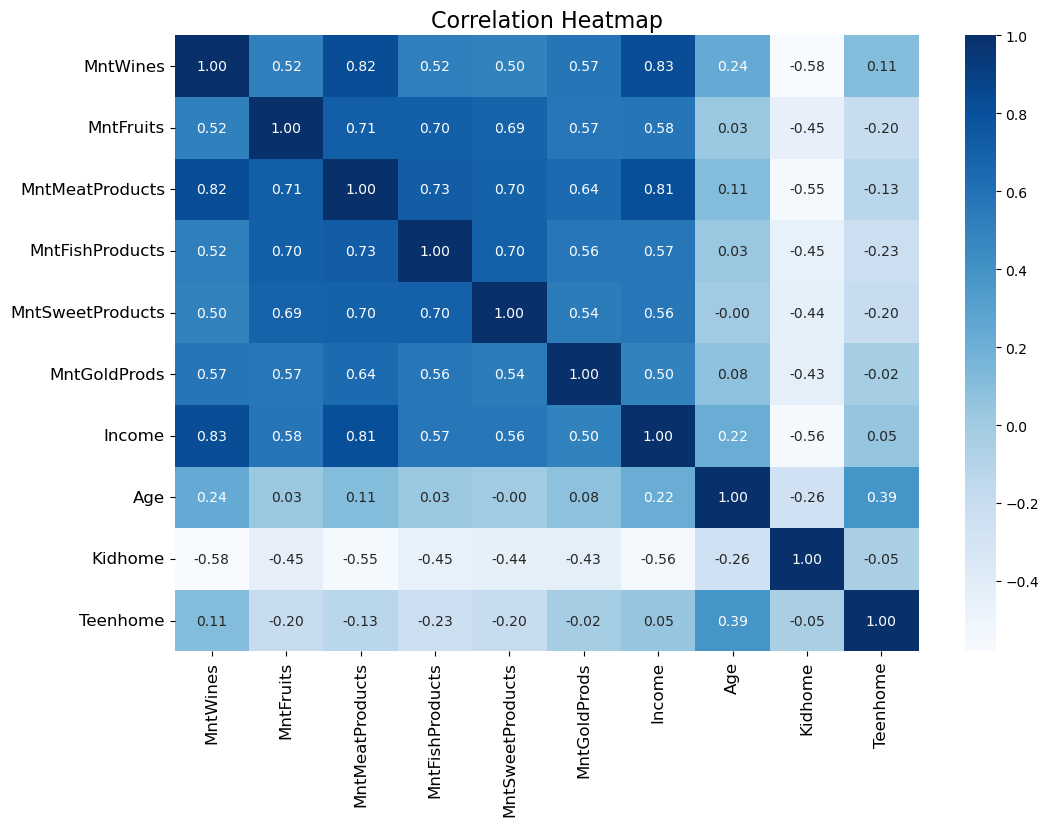

In [55]:
numerical_cols = df.select_dtypes(include='number')
product_cols = [col for col in numerical_cols.columns if 'Mnt' in col]
correlation_cols = product_cols + ['Income', 'Age', 'Kidhome', 'Teenhome']
correlation_matrix = numerical_cols[correlation_cols].corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Insight

**1. Korelasi antar Produk:**

* Korelasi yang cukup kuat terlihat antara MntWines dan MntMeatProducts (0.82), MntMeatProducts dan MntFruits (0.71) serta MntFishProducts dan MntSweetProducts (0.7). Semua kategori produk (MntWines, MntFruits, dll.) memiliki korelasi positif satu sama lain yang mengindikasi adanya peluang untuk cross-selling antar produk.

**2. Korelasi Produk dengan Income:**

* Semua produk memiliki korelasi positif dengan pendapatan (Income) terutama MntWines (0.83), MntMeatProducts (0.81), serta MntFruits, MntFishProducts, dan MntSweetProducts (0.56–0.58). Artinya, pelanggan dengan pendapatan lebih tinggi cenderung menghabiskan lebih banyak uang pada produk tersebut, terutama produk daging dan wine.

**3. Korelasi Produk dengan Age:**

* Korelasi antara umur dan produk sangat lemah. Korelasi tertinggi adalah dengan MntWines (0.24), sementara produk lainnya di bawah 0.10. Hal ini manandakan bahwa umur pelanggan tidak menjadi faktor signifikan dalam menentukan pengeluaran untuk produk.

**4. Korelasi Produk dengan Kidhome dan Teenhome:**

* Kidhome memiliki korelasi negatif dengan semua kategori produk, terutama MntWines (-0.58) dan MntMeatProducts (-0.55). Ini mengindikasikan bahwa pelanggan dengan anak kecil cenderung membelanjakan lebih sedikit untuk produk seperti wine dan daging.
* Teenhome memiliki korelasi yang lebih lemah dibandingkan dengan Kidhome (< 0.11) yang menunjukkan bahwa jika pelanggan memiliki anak remaja tidak menjadi faktor penting dalam pengeluaran untuk produk

### Median Spending vs `Age_Segment`

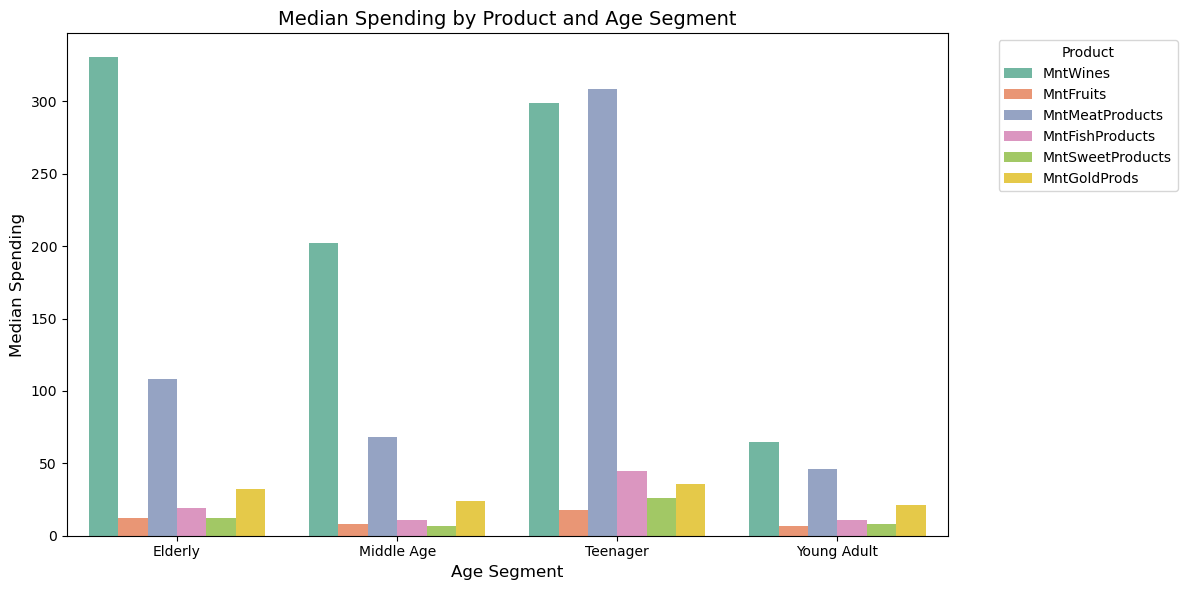

In [58]:
def categorize_age(age):
    if age <= 22:
        return 'Teenager'
    elif 23 <= age <= 39:
        return 'Young Adult'
    elif 40 <= age <= 59:
        return 'Middle Age'
    else:
        return 'Elderly'

df['Age_Segment'] = df['Age'].apply(categorize_age)
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

avg_spending_by_age = df.groupby('Age_Segment')[product_columns].median().reset_index()
avg_spending_melted = avg_spending_by_age.melt(id_vars='Age_Segment', 
                                               var_name='Product', 
                                               value_name='Median Spending')

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_spending_melted, 
            x='Age_Segment', 
            y='Median Spending', 
            hue='Product', 
            palette='Set2')

plt.title('Median Spending by Product and Age Segment', fontsize=14)
plt.xlabel('Age Segment', fontsize=12)
plt.ylabel('Median Spending', fontsize=12)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

### Insight

**1. Wine Mendominasi Pengeluaran:**

Di semua segmen usia, Wine adalah kategori dengan pengeluaran tertinggi, terutama pada Lansia dan Usia Paruh Baya.

**2. Daging Sebagai Prioritas Kedua:**

Daging menjadi kategori kedua dengan pengeluaran tertinggi di hampir semua segmen.

**3. Segmen Remaja Berbeda:**

Remaja lebih banyak menghabiskan untuk Daging daripada Wine, menunjukkan preferensi yang unik.

**4. Produk Emas dan Permen Paling Rendah:**

Produk Emas dan Permen memiliki pengeluaran terendah di semua segmen, kemungkinan merupakan produk niche atau jarang dibeli.

### Product dengan kontribusi revenue tertinggi

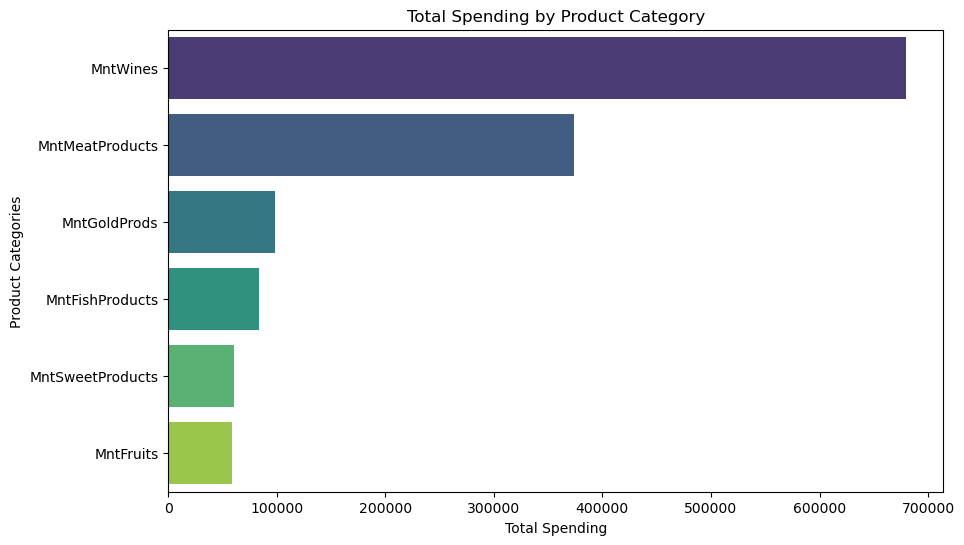

In [61]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spent_per_product = df[product_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=total_spent_per_product.values, y=total_spent_per_product.index, palette="viridis")
plt.title('Total Spending by Product Category')
plt.xlabel('Total Spending')
plt.ylabel('Product Categories')
plt.show()

### Insight

**1. Produk Terpopuler:**

MntWines adalah kategori produk dengan total pengeluaran tertinggi, secara signifikan lebih besar dibandingkan kategori lainnya.
Ini menunjukkan bahwa pelanggan cenderung lebih banyak membeli produk wine dibandingkan kategori lain.

**2. Produk Peringkat Kedua:**

MntMeatProducts menempati posisi kedua dalam total pengeluaran, menunjukkan bahwa produk daging juga menjadi pilihan utama pelanggan setelah wine.

**3. Produk dengan Pengeluaran Terendah:**

MntFruits dan MntSweetProducts adalah kategori dengan total pengeluaran terendah, menunjukkan bahwa produk ini memiliki permintaan yang relatif rendah dibandingkan kategori lain.

### Median Spending and Product vs `Kidhome`

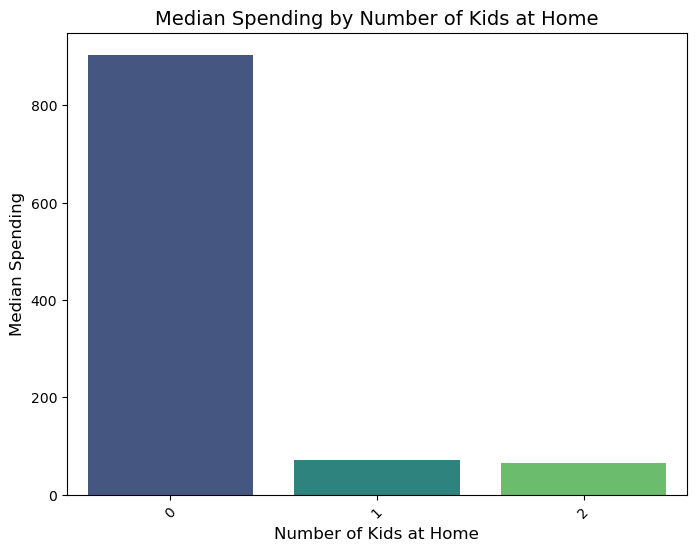

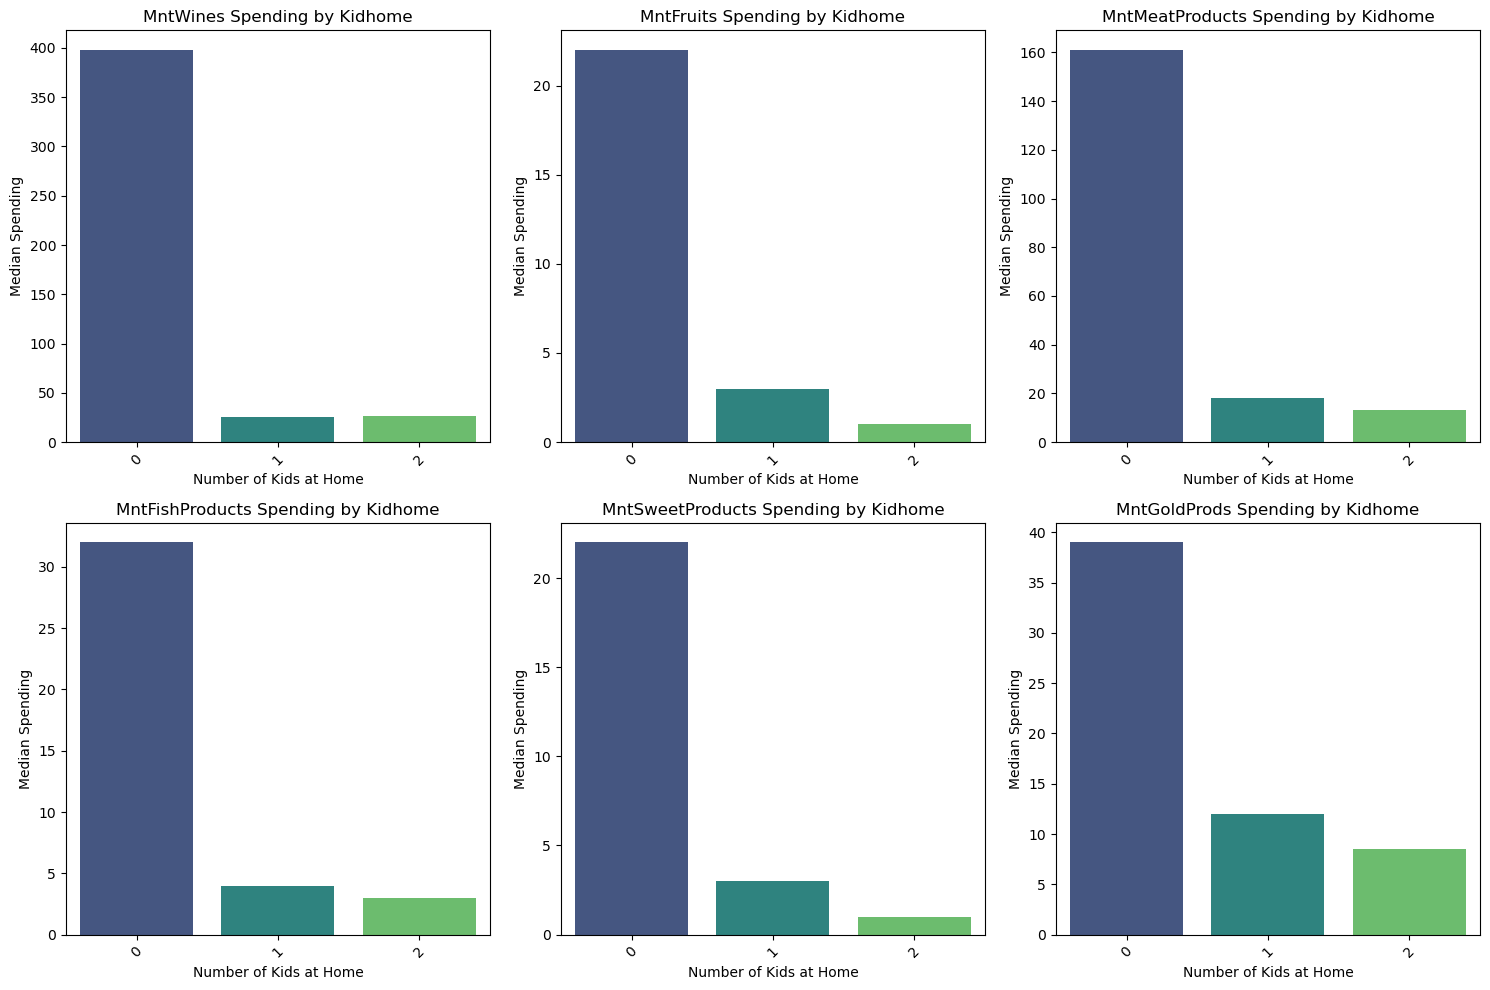

In [64]:
df['Total_Spending'] = df[product_columns].sum(axis=1)
kidhome_spending = df.groupby('Kidhome')['Total_Spending'].median().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=kidhome_spending.index, y=kidhome_spending.values, palette='viridis')
plt.title('Median Spending by Number of Kids at Home', fontsize=14)
plt.xlabel('Number of Kids at Home', fontsize=12)
plt.ylabel('Median Spending', fontsize=12)
plt.xticks(rotation=45)
plt.show()

product_spending_kidhome = df.groupby('Kidhome')[product_columns].median()
plt.figure(figsize=(15, 10))
for i, product in enumerate(product_columns, 1):
    plt.subplot(2, 3, i)
    product_spending_kidhome_sorted = product_spending_kidhome[product].sort_values(ascending=False)
    sns.barplot(x=product_spending_kidhome_sorted.index, y=product_spending_kidhome_sorted.values, palette='viridis')
    plt.title(f'{product} Spending by Kidhome', fontsize=12)
    plt.xlabel('Number of Kids at Home', fontsize=10)
    plt.ylabel('Median Spending', fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Insight

**1. Median Pengeluaran Keseluruhan**
- **Rumah Tanpa Anak (0 Kids):**  
  Rumah tanpa anak memiliki median pengeluaran tertinggi di semua kategori produk. Untuk kategori wine, median pengeluaran mencapai **±400**, jauh lebih tinggi dibandingkan dengan rumah yang memiliki 1 atau 2 anak.  
- **Rumah dengan Anak (1 atau 2 Kids):**  
  Pengeluaran median untuk rumah dengan anak berada pada tingkat yang sangat rendah di semua kategori produk, menunjukkan pola pembelian yang lebih hemat atau terfokus pada kebutuhan dasar.


 **2. Analisis Per Produk**
- **MntWines (Wine):**  
  Rumah tanpa anak memiliki median pengeluaran **±400**, mendominasi pengeluaran untuk wine. Pengeluaran menurun drastis pada rumah dengan 1 atau 2 anak, yang menunjukkan kemungkinan wine dianggap sebagai kebutuhan premium.  

- **MntMeatProducts (Meat):**  
  Sama seperti wine, rumah tanpa anak memiliki pengeluaran median tertinggi **±160**, sedangkan rumah dengan anak menghabiskan lebih sedikit. Ini mungkin mengindikasikan bahwa rumah dengan anak lebih berfokus pada makanan dasar atau terjangkau.  

- **Kategori Produk Lainnya (Fruits, Fish, Sweets, Gold Products):**  
  Tren serupa terlihat di semua kategori, di mana rumah tanpa anak mendominasi pengeluaran. Produk premium seperti sweets dan gold products juga lebih diminati oleh rumah tanpa anak.  

### Median Spending and Product vs `Income` Group

In [67]:
bins_income = [0, 25000, 50000, 75000, df['Income'].max()]
labels_income = ['Low Income', 'Middle Income', 'High Income', 'Very High Income']
df['Income_Segment'] = pd.cut(df['Income'], bins=bins_income, labels=labels_income, right=True)

print(df['Income_Segment'].value_counts())

Income_Segment
Middle Income       827
High Income         810
Very High Income    358
Low Income          242
Name: count, dtype: int64


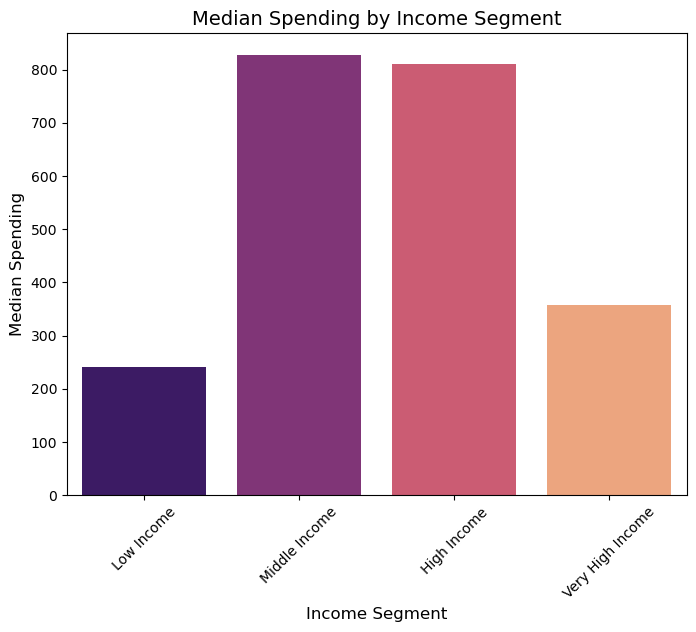

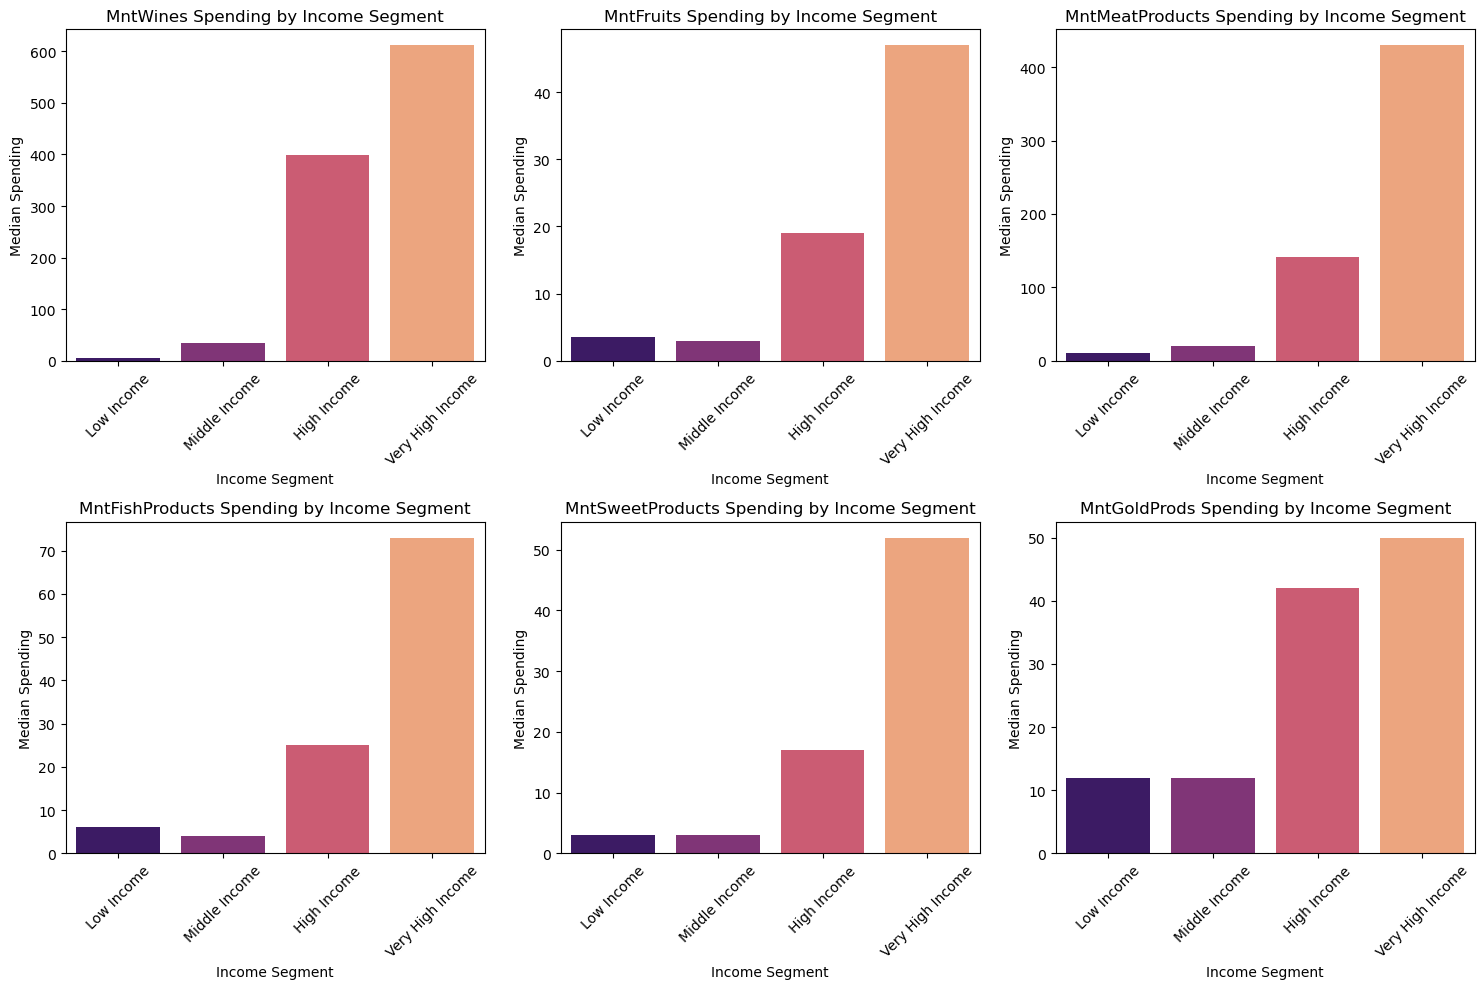

In [68]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Income_Segment', data=df, palette='magma', order=labels_income)
plt.title('Median Spending by Income Segment', fontsize=14)
plt.xlabel('Income Segment', fontsize=12)
plt.ylabel('Median Spending', fontsize=12)
plt.xticks(rotation=45)
plt.show()

product_spending_income = df.groupby('Income_Segment')[product_columns].median()
plt.figure(figsize=(15, 10))
for i, product in enumerate(product_columns, 1):
    plt.subplot(2, 3, i)  # Adjust layout for 6 products
    product_spending_income_sorted = product_spending_income[product].sort_values(ascending=False)
    sns.barplot(x=product_spending_income_sorted.index, y=product_spending_income_sorted.values, palette='magma')
    plt.title(f'{product} Spending by Income Segment', fontsize=12)
    plt.xlabel('Income Segment', fontsize=10)
    plt.ylabel('Median Spending', fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Insight

**1. Middle Income dan High Income:**

Segmen **Middle Income** memiliki median pengeluaran tertinggi, diikuti oleh **High Income**, keduanya berada di kisaran 800-900. Hal ini menunjukkan bahwa pelanggan dengan pendapatan menengah hingga tinggi cenderung lebih aktif berbelanja. Segmen ini dapat menjadi target utama untuk strategi pemasaran dengan fokus pada produk premium atau penawaran bundling.

**2. Very High Income:**

Segmen **Very High Income** memiliki median pengeluaran yang lebih rendah dibandingkan dengan Middle dan High Income (~400). Ini dapat mengindikasikan bahwa pelanggan dengan pendapatan sangat tinggi memiliki preferensi pengeluaran yang berbeda atau lebih selektif dalam pembelian produk supermarket. Pendekatan yang lebih personal seperti produk eksklusif atau loyalty program dapat menarik perhatian segmen ini.

**3. Low Income:**

Segmen **Low Income** memiliki median pengeluaran yang rendah (~200). Hal ini sesuai dengan keterbatasan daya beli mereka. Namun, segmen ini dapat dijangkau melalui strategi diskon, promosi produk dengan harga terjangkau, atau kampanye edukasi untuk memperkenalkan produk baru yang sesuai dengan kebuthan mereka.
gkau atau promosi diskon.

## `5.3 Statistic Test Analysis`

### `Income` dan product normality test

In [72]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

_, p_income = shapiro(df['Income'])
print(f"Income Normality Test p-value: {p_income}")

for product in product_columns:
    _, p_product = shapiro(df[product])
    print(f"{product} Normality Test p-value: {p_product}")

Income Normality Test p-value: 5.826791000597308e-48
MntWines Normality Test p-value: 6.098078953240608e-43
MntFruits Normality Test p-value: 1.6531793572706635e-53
MntMeatProducts Normality Test p-value: 3.803481065256528e-51
MntFishProducts Normality Test p-value: 2.0326586605994383e-52
MntSweetProducts Normality Test p-value: 1.2002395483041281e-53
MntGoldProds Normality Test p-value: 1.1682463368130057e-48


### Insight

Kolom `Income` serta product memiliki nilai p-value dibawah 0.5 (p-val < 0.5) yang menandakan bahwa data tidak terdistribusi normal

### Uji statistik korelasi

Untuk membuktikan hasil visualisasi heatmap yang sudah dibuat, dilakukan uji statistic korelasi dengan metode spearman (data tidak terdistribusi normal) terutama pada kolom yang menjadi variable penting untuk pengeluaran produk

In [76]:
for product in product_columns:
    correlation = df['Income'].corr(df[product], method='spearman')
    print(f"spearman Correlation between Income and {product}: {correlation}")

for product in product_columns:
    correlation = df['Kidhome'].corr(df[product], method='spearman')
    print(f"Spearman Correlation between Kidhome and {product}: {correlation}")

spearman Correlation between Income and MntWines: 0.8269559166930254
spearman Correlation between Income and MntFruits: 0.5774111182769658
spearman Correlation between Income and MntMeatProducts: 0.8115985417763948
spearman Correlation between Income and MntFishProducts: 0.5727755604311434
spearman Correlation between Income and MntSweetProducts: 0.5618667543150141
spearman Correlation between Income and MntGoldProds: 0.5020236106901534
Spearman Correlation between Kidhome and MntWines: -0.5808150604989311
Spearman Correlation between Kidhome and MntFruits: -0.4505073778984234
Spearman Correlation between Kidhome and MntMeatProducts: -0.5511498371207434
Spearman Correlation between Kidhome and MntFishProducts: -0.4526796849317266
Spearman Correlation between Kidhome and MntSweetProducts: -0.4392383649444851
Spearman Correlation between Kidhome and MntGoldProds: -0.4270565736018927


### Insight

Sesuai dengan treemap yang sudah ditampilkan sebelumnya, nilai korelasi product dengan kolom `Income` correlasi tinggi (positif) dan product dengan kolom `Kidhome` memliki korelasi yang moderat 

### Uji statistik Spending dengan `Age_Segment` & `Kidhome` menggunakan Kruskal

In [79]:
kruskal_results = []
for product in product_columns:
    groups = [df[df['Age_Segment'] == segment][product] for segment in df['Age_Segment'].unique()]
    stat, p_value = kruskal(*groups)
    kruskal_results.append({'Product': product, 'Statistic': stat, 'P-Value': p_value})
kruskal_results_df = pd.DataFrame(kruskal_results)
kruskal_results_df

Product  Statistic       P-Value
0          MntWines  98.305883  3.595265e-21
1         MntFruits   7.971070  4.661340e-02
2   MntMeatProducts  34.914310  1.270104e-07
3   MntFishProducts  15.226697  1.632820e-03
4  MntSweetProducts  14.930036  1.877425e-03
5      MntGoldProds  17.217584  6.375262e-04

In [80]:
kruskal_results = []
for product in product_columns:
    spending_groups = [df[df['Kidhome'] == kids][product] for kids in df['Kidhome'].unique()]
    stat, p_value = kruskal(*spending_groups)
    kruskal_results.append({'Product': product, 'Statistic': stat, 'P-Value': p_value})

kruskal_results_df = pd.DataFrame(kruskal_results)
kruskal_results_df

Product   Statistic        P-Value
0          MntWines  763.166652  1.907512e-166
1         MntFruits  454.115845   2.454693e-99
2   MntMeatProducts  683.227771  4.354864e-149
3   MntFishProducts  459.653412  1.540032e-100
4  MntSweetProducts  431.576009   1.925132e-94
5      MntGoldProds  409.169970   1.412115e-89

**1. Uji Spending dengan Age_Segment:**
- **Signifikan pada MntWines, MntMeatProducts, MntFishProducts, dan MntGoldProds:**
  * Berdasarkan hasil Kruskal-Wallis, produk seperti **MntWines, MntMeatProducts, MntFishProducts,** dan **MntGoldProds** menunjukkan **p-value < 0.05**. Hal ini menunjukkan adanya **perbedaan signifikan** dalam pola pengeluaran di produk-produk ini berdasarkan segmen usia pelanggan.
  * Produk **MntWines** memiliki perbedaan yang sangat signifikan dengan nilai statistik tertinggi (97.91) dibandingkan produk lain, menunjukkan bahwa preferensi wine sangat bervariasi di antara segmen usia.

- **Tidak Signifikan pada MntFruits dan MntSweetProducts:**
  * Produk seperti **MntFruits** dan **MntSweetProducts** memiliki **p-value > 0.05**, yang berarti tidak ada perbedaan signifikan dalam pengeluaran untuk produk ini berdasarkan segmen usia.

**Rekomendasi:**
- Fokus pada segmentasi usia untuk produk seperti **MntWines** dan **MntMeatProducts**, karena mereka menunjukkan perbedaan preferensi yang signifikan.
- Untuk **MntFruits** dan **MntSweetProducts**, pendekatan pemasaran dapat lebih bersifat umum karena preferensinya seragam di semua segmen usia.

**2. Uji Spending dengan Kidhome:**
- **Signifikan pada Semua Produk:**
  - Semua kategori produk (**MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds**) menunjukkan **p-value < 0.05**, menandakan bahwa ada **perbedaan signifikan** dalam pola pengeluaran berdasarkan jumlah anak di rumah (Kidhome).
  - **MntWines** dan **MntMeatProducts** memiliki nilai statistik tertinggi (763.16 dan 683.22), menunjukkan perbedaan preferensi yang mencolok dalam segmen ini.

## `5.4 RFM Analysis`

In [83]:
df

ID   Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524  Graduation         Single  58138.0        0         0   
1      2174  Graduation         Single  46344.0        1         1   
2      4141  Graduation        Married  71613.0        0         0   
3      6182  Graduation        Married  26646.0        1         0   
4      5324         PhD        Married  58293.0        1         0   
...     ...         ...            ...      ...      ...       ...   
2235  10870  Graduation        Married  61223.0        0         1   
2236   4001         PhD        Married  64014.0        2         1   
2237   7270  Graduation       Divorced  56981.0        0         0   
2238   8235      Master        Married  69245.0        0         1   
2239   9405         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58       635         88              546   
1     2014-03-08       38        11          1                6   
2     2013-08-21       26       426         49              127   
3     2014-02-10       26        11          4               20   
4     2014-01-19       94       173         43              118   
...          ...      ...       ...        ...              ...   
2235  2013-06-13       46       709         43              182   
2236  2014-06-10       56       406          0               30   
2237  2014-01-25       91       908         48              217   
2238  2014-01-24        8       428         30              214   
2239  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0           

In [84]:
reference_date = df['Dt_Customer'].max() + pd.Timedelta(days=1)
df['Recency'] = (reference_date - df['Dt_Customer']).dt.days
df['Frequency'] = (
    df['NumWebPurchases'] +
    df['NumCatalogPurchases'] +
    df['NumStorePurchases']
)

product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Monetary'] = df[product_columns].sum(axis=1)

r_bins = pd.qcut(df['Recency'], 5, duplicates='drop')
df['R_Score'] = pd.qcut(
    df['Recency'],
    len(r_bins.cat.categories),
    labels=range(len(r_bins.cat.categories), 0, -1)
).astype(int)

f_bins = pd.qcut(df['Frequency'], 5, duplicates='drop')
df['F_Score'] = pd.qcut(
    df['Frequency'],
    len(f_bins.cat.categories),
    labels=range(1, len(f_bins.cat.categories) + 1)
).astype(int)

m_bins = pd.qcut(df['Monetary'], 5, duplicates='drop')
df['M_Score'] = pd.qcut(
    df['Monetary'],
    len(m_bins.cat.categories),
    labels=range(1, len(m_bins.cat.categories) + 1)
).astype(int)

weights = {'Recency': 0.2, 'Frequency': 0.3, 'Monetary': 0.5}
df['Weighted_RFM_Score'] = (
    df['R_Score'] * weights['Recency'] +
    df['F_Score'] * weights['Frequency'] +
    df['M_Score'] * weights['Monetary']
)

def assign_segment(score):
    if score >= 4.0:
        return 'VIP'
    elif score >= 3.0:
        return 'Potential Revenue Drivers'
    elif score >= 2.0:
        return 'At-Risk'
    else:
        return 'Low Value'

df['Segment'] = df['Weighted_RFM_Score'].apply(assign_segment)

rfm_summary = df.groupby('Segment').agg({
    'Recency': 'median',
    'Frequency': 'median',
    'Monetary': 'median',
    'Segment': 'size'    
}).rename(columns={'Segment': 'Customer Count'}).reset_index()

rfm_summary

Segment  Recency  Frequency  Monetary  Customer Count
0                    At-Risk    362.5        7.0     138.0             522
1                  Low Value    360.0        4.0      41.0             559
2  Potential Revenue Drivers    398.0       16.0     732.0             629
3                        VIP    281.0       21.0    1364.0             527

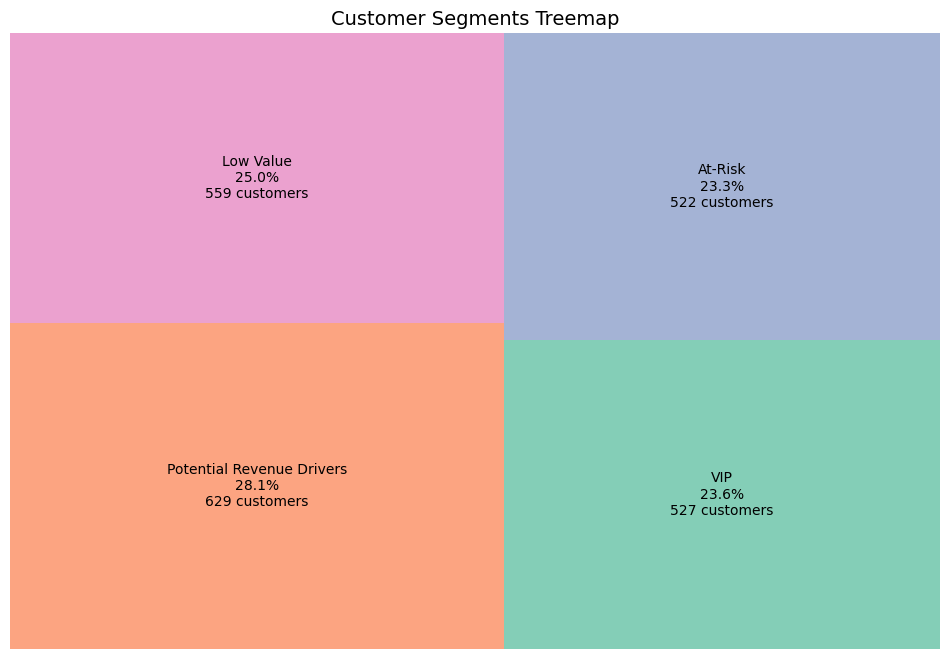

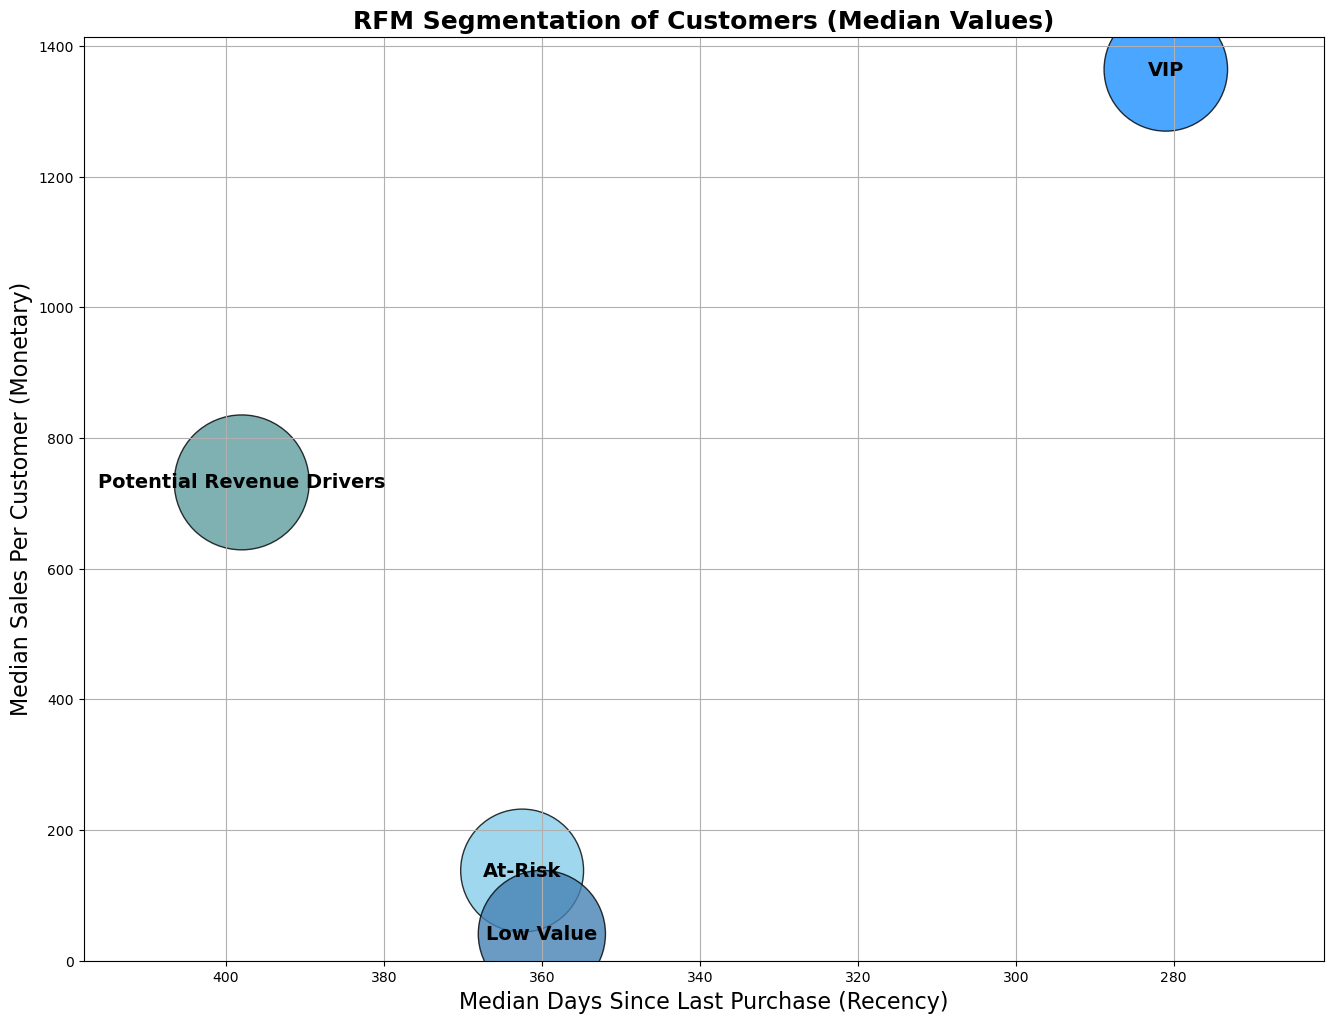

In [85]:
import squarify
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palette
segment_colors = sns.color_palette('Set2', n_colors=4) 
color_map = dict(zip(['VIP', 'Potential Revenue Drivers', 'At-Risk', 'Low Value'], segment_colors))

# Treemap
treemap_data = df['Segment'].value_counts(normalize=True).reset_index()
treemap_data.columns = ['Segment', 'Percentage']
treemap_data['Count'] = df['Segment'].value_counts().values
treemap_data['Percentage'] *= 100 

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=treemap_data['Count'],
    label=[f"{row['Segment']}\n{row['Percentage']:.1f}%\n{row['Count']} customers" for _, row in treemap_data.iterrows()],
    color=[color_map[row['Segment']] for _, row in treemap_data.iterrows()], 
    alpha=0.8
)
plt.title('Customer Segments Treemap', fontsize=14)
plt.axis('off')
plt.show()

segment_summary = df.groupby('Segment').agg(
    avg_days_since_purchase=('Recency', 'median'), 
    avg_sales_per_customer=('Monetary', 'median'), 
    customer_count=('Segment', 'size')          
).reset_index()

# Define blue variants for the colors
color_map = {
    'At-Risk': '#87CEEB',  # SkyBlue
    'Low Value': '#4682B4',  # SteelBlue
    'Potential Revenue Drivers': '#5F9EA0',  # CadetBlue
    'VIP': '#1E90FF'  # DodgerBlue
}

plt.figure(figsize=(16, 12))
scatter = plt.scatter(
    x=segment_summary['avg_days_since_purchase'],
    y=segment_summary['avg_sales_per_customer'],
    s=segment_summary['customer_count'] * 15, 
    c=[color_map[segment] for segment in segment_summary['Segment']], 
    alpha=0.8,
    edgecolors='black'
)

plt.xlabel('Median Days Since Last Purchase (Recency)', fontsize=16)
plt.ylabel('Median Sales Per Customer (Monetary)', fontsize=16)
plt.title('RFM Segmentation of Customers (Median Values)', fontsize=18, fontweight='bold')
plt.grid(True)

for i, row in segment_summary.iterrows():
    plt.annotate(
        row['Segment'], 
        (row['avg_days_since_purchase'], row['avg_sales_per_customer']),
        ha='center',
        va='center',
        fontsize=14,
        weight='bold'
    )

plt.gca().invert_xaxis()
plt.xlim(segment_summary['avg_days_since_purchase'].max() + 20, segment_summary['avg_days_since_purchase'].min() - 20)
plt.ylim(0, segment_summary['avg_sales_per_customer'].max() + 50)
plt.show()

### **Insight**

**Analisis Treemap:**
- Segmen **Potential Revenue Drivers** memiliki porsi pelanggan terbesar (**28.1%**).
- Pelanggan **VIP** hanya mencakup **23.6%** dari total, namun memberikan kontribusi tertinggi dalam hal pengeluaran.
- Segmen **At-Risk** dan **Low-Value** memiliki ukuran yang signifikan, tetapi menjadi tantangan karena kontribusi mereka terhadap total pendapatan relatif rendah.

**Insight Bubble Chart:**
- Segmen **VIP** menonjol dengan **median spending** tertinggi dan **recency** terendah, berada di kuadran kanan atas.
- Segmen **Potential Revenue Drivers** menunjukkan keseimbangan antara pengeluaran dan frekuensi, namun nilai **recency** mereka menunjukkan peluang untuk melibatkan kembali.
- Segmen **At-Risk** dan **Low-Value** berkumpul bersama dengan pengeluaran dan frekuensi rendah, yang menyoroti kebutuhan akan strategi keterlibatan yang lebih terfokus.


In [87]:
print(df[['Recency', 'Frequency', 'Monetary']].describe())

           Recency    Frequency     Monetary
count  2237.000000  2237.000000  2237.000000
mean    354.790344    12.544032   605.743406
std     202.137961     7.205919   601.840466
min       1.000000     0.000000     5.000000
25%     182.000000     6.000000    69.000000
50%     357.000000    12.000000   396.000000
75%     530.000000    18.000000  1045.000000
max     700.000000    32.000000  2525.000000


In [88]:
product_spending_by_segment = df.groupby('Segment')[product_columns].mean().reset_index()
sorted_product_spending = product_spending_by_segment.set_index('Segment').T.sort_values(by='VIP', axis=0, ascending=False)
print(sorted_product_spending)

Segment             At-Risk  Low Value  Potential Revenue Drivers         VIP
MntWines          94.547893  16.543828                 412.891892  686.388994
MntMeatProducts   43.795019  11.144902                 200.980922  413.444023
MntFishProducts   12.597701   4.443649                  49.370429   83.159393
MntGoldProds      29.241379   9.227191                  61.613672   74.347249
MntSweetProducts   8.726054   2.933810                  35.130366   61.216319
MntFruits          8.984674   2.969589                  34.635930   58.123340


<Figure size 1400x800 with 0 Axes>

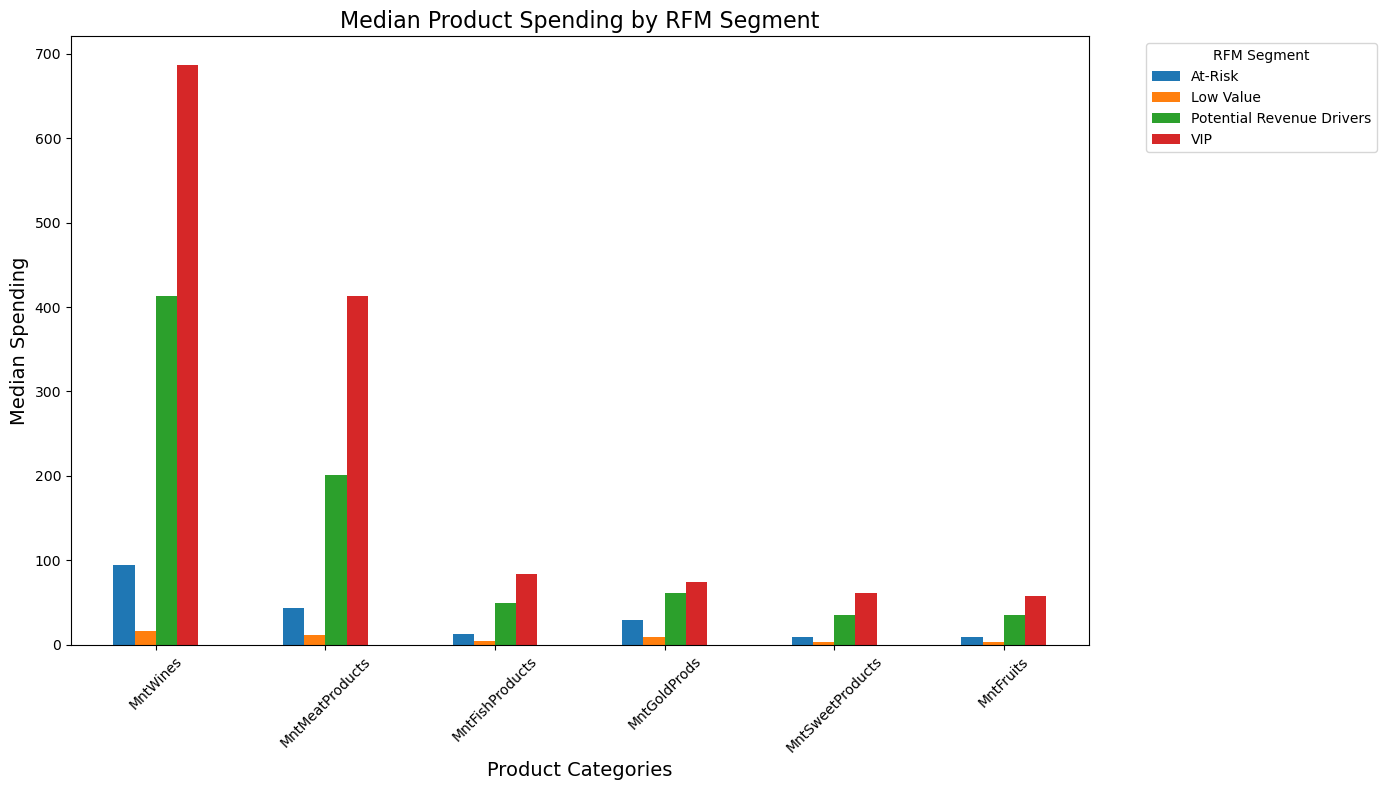

In [89]:
plt.figure(figsize=(14, 8))
sorted_product_spending.plot(kind='bar', figsize=(14, 8))
plt.title('Median Product Spending by RFM Segment', fontsize=16)
plt.xlabel('Product Categories', fontsize=14)
plt.ylabel('Median Spending', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='RFM Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Insight**

1. **MntWines (Wine):**
   - Segmen **VIP** memiliki pengeluaran median tertinggi, hampir mencapai **700**, menunjukkan preferensi kuat terhadap produk wine.
   - **Potential Revenue Drivers** juga menunjukkan pengeluaran signifikan untuk wine (~450), menjadi segmen potensial untuk promosi premium.
   - Segmen **At-Risk** dan **Low Value** memiliki pengeluaran sangat rendah, menunjukkan bahwa wine bukan produk prioritas bagi mereka.

2. **MntMeatProducts (Meat):**
   - **VIP** mendominasi dengan pengeluaran median lebih dari **400**, diikuti oleh **Potential Revenue Drivers** dengan pengeluaran ~250.
   - Pengeluaran oleh segmen **At-Risk** dan **Low Value** relatif kecil.

3. **Produk Lainnya (Fish, Gold Products, Sweets, Fruits):**
   - **VIP** tetap menjadi pemimpin di semua kategori produk, meskipun dengan perbedaan yang lebih kecil dibandingkan wine dan daging.
   - Segmen **Potential Revenue Drivers** juga menunjukkan minat yang konsisten pada produk-produk ini, menjadikannya target utama untuk penjualan silang dan promosi.
   - Segmen **At-Risk** dan **Low Value** memiliki pengeluaran median yang rendah secara konsisten, menunjukkan daya beli yang terbatas atau kurangnya ketertarikan pada kategori ini.

4. **Kesimpulan:**
   - **VIP** dan **Potential Revenue Drivers** adalah segmen yang paling menguntungkan dan memiliki potensi untuk ditingkatkan melalui strategi upselling dan penjualan silang.
   - Fokus pada produk wine dan daging dapat memberikan dampak signifikan pada pendapatan.
   - Segmen **At-Risk** dan **Low Value** memerlukan strategi khusus seperti diskon atau bundling untuk meningkatkan keterlibatan dan pengeluaran mereka.


In [91]:
def suggest_promotions(segment, top_products):
    if segment == 'VIP':
        return f"Exclusive bundles with {', '.join(top_products)} and personalized offers."
    elif segment == 'Potential Revenue Drivers':
        return f"Cross-sell {top_products[0]} with discounts on {top_products[1]}."
    elif segment == 'At-Risk':
        return f"Discount on {top_products[0]} to re-engage customers."
    else:  # 'Low Value'
        return f"Starter offers for {top_products[0]} to attract more spending."

for segment in sorted_product_spending.columns:
    top_products = sorted_product_spending.sort_values(by=segment, ascending=False).index[:3].tolist()  # Top 3 products for each segment
    promotion = suggest_promotions(segment, top_products)
    print(f"Promotions for {segment} Segment:")
    print(promotion)
    print("-" * 50)

Promotions for At-Risk Segment:
Discount on MntWines to re-engage customers.
--------------------------------------------------
Promotions for Low Value Segment:
Starter offers for MntWines to attract more spending.
--------------------------------------------------
Promotions for Potential Revenue Drivers Segment:
Cross-sell MntWines with discounts on MntMeatProducts.
--------------------------------------------------
Promotions for VIP Segment:
Exclusive bundles with MntWines, MntMeatProducts, MntFishProducts and personalized offers.
--------------------------------------------------


# `6. Conclusion & Recommendation`

## **1. Prioritaskan Pelanggan Bernilai Tinggi**

**Insight**:  
Segmen **VIP** memberikan kontribusi signifikan terhadap pendapatan, sehingga penting untuk mempertahankan mereka melalui program loyalitas dan pengalaman yang dipersonalisasi. Analisis usia menunjukkan bahwa segmen **Elderly** dan **Middle Age** memiliki pengeluaran median tertinggi pada produk premium seperti wine dan daging.

**Rekomendasi**:  
- Kembangkan program loyalitas yang menawarkan manfaat eksklusif untuk VIP.  
- Fokuskan kampanye pemasaran untuk segmen **Elderly** dan **Middle Age**, dengan penawaran premium seperti wine dan daging.  
- Gunakan kampanye email atau SMS otomatis dengan pesan "Kami Merindukan Anda!" dan diskon untuk pelanggan At-Risk.  
- Berikan bundel pemula atau diskon kecil untuk melibatkan pelanggan Low Value.  

**Sumber**:  
[**Pareto Principle (80/20 Rule)**](https://www.smartinsights.com/marketing-planning/marketing-models/paretos-8020-rule-marketing/)

---

## **2. Pemasaran Berbasis Pelanggan Sesuai dengan Promosi dan Preferensi**

**Insight**:  
Segmentasi RFM dan data demografis Anda (mis., pendapatan, jumlah anak) memungkinkan penawaran yang dipersonalisasi. VIP menghargai eksklusivitas dan produk berkualitas tinggi, sedangkan pelanggan At-Risk merespons lebih baik terhadap promosi berbasis urgensi. Segmen **Teenager** menunjukkan preferensi untuk produk dengan harga lebih rendah seperti buah dan permen.

**Rekomendasi**:  
- Untuk **VIP**, fokuskan pada bundel premium seperti wine dan produk emas untuk meningkatkan pengalaman belanja mereka.  
- Untuk **At-Risk**, terapkan diskon berbatas waktu pada item yang sering dibeli (mis., produk daging).  
- Buat promosi bertarget untuk **Teenager**, seperti diskon pada buah dan permen untuk mendorong pembelian berulang.  
- Gunakan strategi gamifikasi untuk pelanggan Low Value, seperti poin loyalitas atau hadiah bertingkat.  

**Sumber**:  
[**Segmentation Theory**](https://www.moengage.com/blog/rfm-analysis-using-rfm-segments/)

---

## **3. Promosikan Produk Komplementer**

**Insight**:  
Analisis Anda menunjukkan VIP lebih menyukai wine dan daging, sementara segmen **Teenager** lebih memilih permen dan buah. Data ini menyoroti peluang untuk bundling dan penjualan silang.

**Rekomendasi**:  
- Untuk VIP, bundel produk premium seperti wine dan daging untuk meningkatkan pendapatan.  
- Untuk Potential Revenue Drivers, jual silang item pelengkap, seperti daging dan ikan, untuk meningkatkan nilai pesanan.  
- Untuk Teenager, buat promosi bundel permen dan buah dengan harga terjangkau untuk meningkatkan keterlibatan.  

**Sumber**:  
[**Market Basket Analysis**](https://www.ijrbsm.org/pdf/v2-i11/5.pdf)

---

## **4. Fokus pada Penargetan Perilaku**

**Insight**:  
Skor RFM berbobot Anda menyoroti VIP dan Potential Revenue Drivers sebagai segmen prioritas. Data segmen usia memberikan peluang untuk menggabungkan pendekatan berbasis perilaku dengan preferensi demografis.

**Rekomendasi**:  
- Kirim penawaran berbasis kategori produk favorit masing-masing kelompok usia melalui email atau media sosial.  
- Untuk pelanggan At-Risk, sesuaikan penawaran berdasarkan kombinasi usia dan kategori produk mereka.  
- Buat kampanye yang disesuaikan untuk setiap segmen RFM.  

**Sumber**:  
[**Customer Value Optimization**](https://www.omniconvert.com/blog/rfm-marketing/)

---

## **5. Membangun Loyalitas Melalui Keterlibatan**

**Insight**:  
VIP dan Potential Revenue Drivers dapat dipupuk melalui pemasaran emosional dan pengalaman. Pelanggan **Elderly** dapat dihargai dengan pengalaman eksklusif, sementara segmen **Teenager** membutuhkan pengalaman gamifikasi untuk menarik perhatian.

**Rekomendasi**:  
- Tawarkan pengalaman yang dipersonalisasi kepada VIP, seperti akses awal ke produk atau undangan ke acara eksklusif.  
- Buat acara khusus, seperti **Wine Tasting Night**, untuk segmen **Elderly** dan **Middle Age**.  
- Kembangkan game belanja online yang memberikan poin atau hadiah untuk segmen **Teenager**.  

**Sumber**:  
[**Maslow’s Hierarchy of Needs**](https://www.optimizely.com/optimization-glossary/ab-testing/)

---

## **6. Membedakan Melalui Kualitas dan Eksklusivitas**

**Insight**:  
Penawaran produk premium Anda (mis., wine dan daging) dapat membedakan merek Anda di pasar. Dengan menekankan kualitas dan eksklusivitas, Anda dapat menarik pelanggan bernilai tinggi. Data menunjukkan bahwa segmen **Elderly** menghargai kualitas produk premium, sementara pelanggan muda lebih responsif terhadap harga.

**Rekomendasi**:  
- Untuk **Elderly**, perkuat kampanye pemasaran yang menekankan kualitas tinggi dan eksklusivitas produk premium.  
- Untuk **Teenager**, gunakan strategi diskon untuk menarik minat mereka pada produk dengan harga lebih rendah.  

**Sumber**:  
[**Porter’s Five Forces**](https://www.businessnewsdaily.com/5446-porters-five-forces.html)

---

## **7. Tingkatkan Strategi dengan Analitik**

**Insight**:  
Segmentasi RFM dan analisis pengeluaran Anda memberikan dasar untuk strategi berbasis data. Penilaian rutin terhadap perilaku pelanggan memastikan kampanye Anda tetap efektif.

**Rekomendasi**:  
- Terapkan A/B testing untuk menyempurnakan promosi dan mengukur efektivitas kampanye.  
- Gunakan analitik prediktif untuk mengidentifikasi pelanggan At-Risk lebih awal dan melibatkan mereka secara proaktif.  

**Sumber**:  
[**A/B Testing**](https://www.optimizely.com/optimization-glossary/ab-testing/)

---


In [94]:
from scipy.stats import kruskal

# Initialize a list to store results
kruskal_results = []

# Loop through each product to test against education
for product in product_columns:
    # Create groups for each education level
    groups = [df[df['Education'] == edu][product] for edu in df['Education'].unique()]
    
    # Perform Kruskal-Wallis test
    stat, p_value = kruskal(*groups)
    
    # Append results
    kruskal_results.append({'Product': product, 'Statistic': stat, 'P-Value': p_value})

# Convert results to a DataFrame
kruskal_results_df = pd.DataFrame(kruskal_results)

print(kruskal_results_df)


            Product   Statistic       P-Value
0          MntWines  172.857246  3.074686e-37
1         MntFruits   48.571183  1.609575e-10
2   MntMeatProducts   92.179969  7.451942e-20
3   MntFishProducts   53.415491  1.495068e-11
4  MntSweetProducts   57.343476  2.170647e-12
5      MntGoldProds   62.483239  1.732008e-13


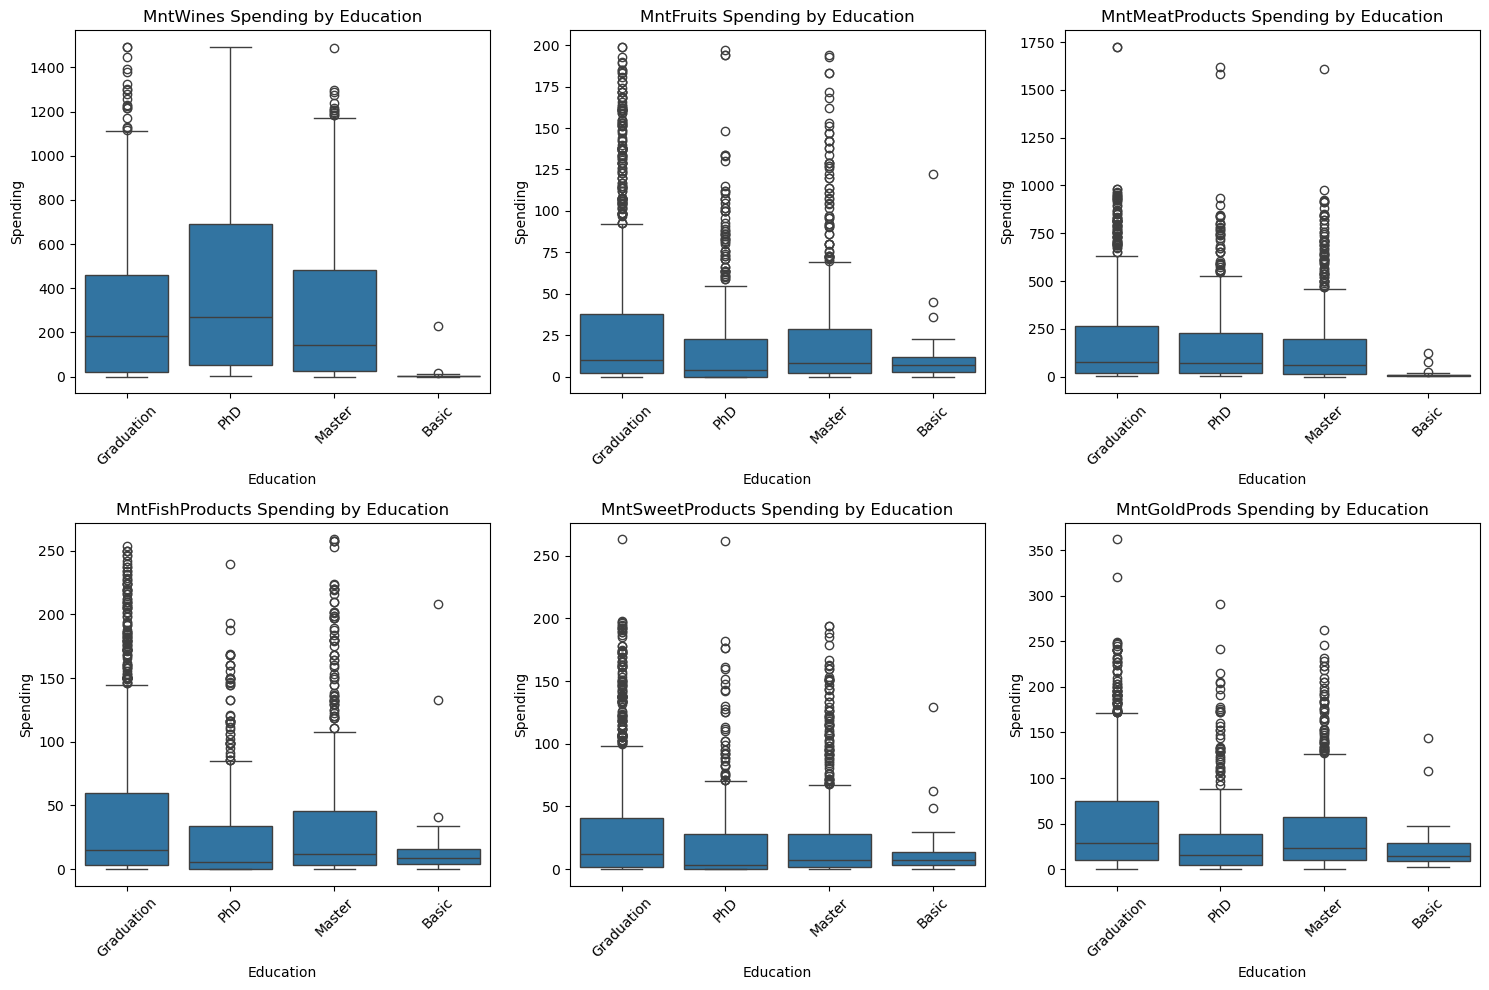

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, product in enumerate(product_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Education', y=product, data=df)
    plt.title(f'{product} Spending by Education')
    plt.xlabel('Education')
    plt.ylabel('Spending')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [96]:
import pandas as pd
import scipy.stats as stats

# List of Mnt product columns
mnt_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Dictionary to store results
anova_results = []

# Perform ANOVA for each product
for col in mnt_columns:
    groups = [group[col].dropna() for _, group in df.groupby('Kidhome')]  # Group data by KidHome
    statistic, p_value = stats.f_oneway(*groups)  # Perform one-way ANOVA
    anova_results.append({'Product': col, 'Statistic': statistic, 'P-Value': p_value})

# Convert results to a DataFrame for better visualization
anova_df = pd.DataFrame(anova_results)

# Print results
print(anova_df)


            Product   Statistic        P-Value
0          MntWines  395.747497  7.521031e-148
1         MntFruits  193.944751   2.155915e-78
2   MntMeatProducts  284.824501  6.585540e-111
3   MntFishProducts  211.247837   9.389024e-85
4  MntSweetProducts  189.296358   1.139719e-76
5      MntGoldProds  165.371153   1.056931e-67


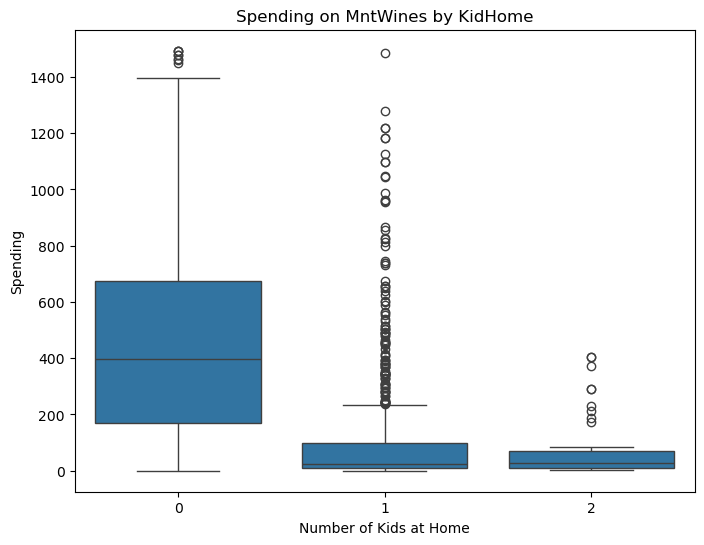

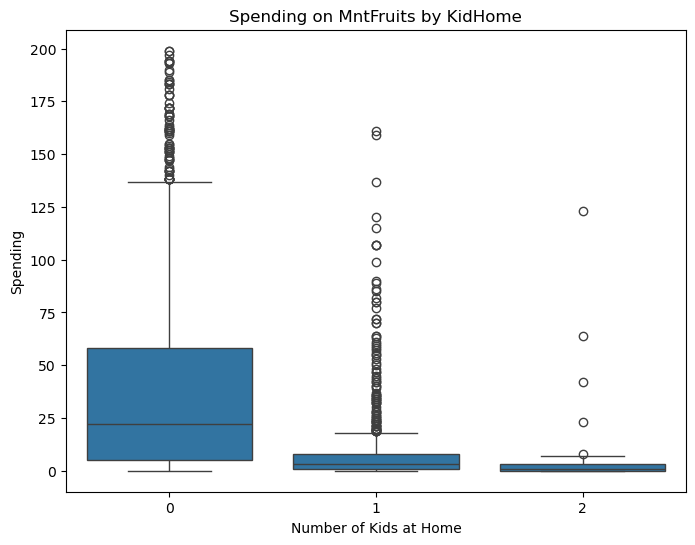

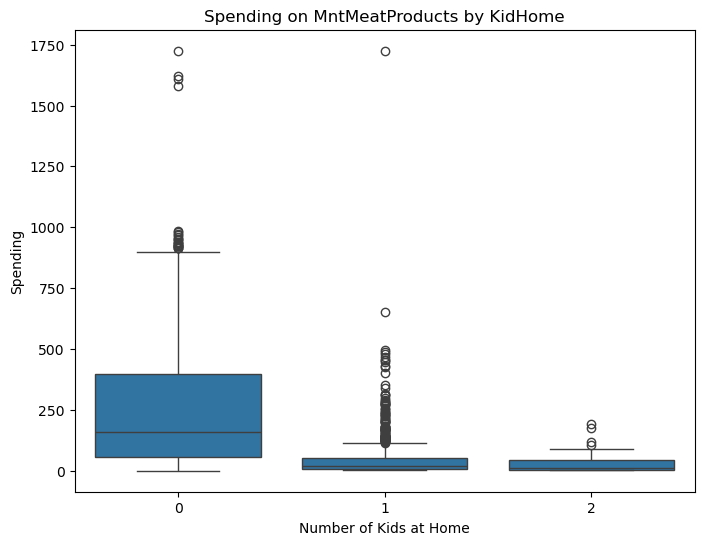

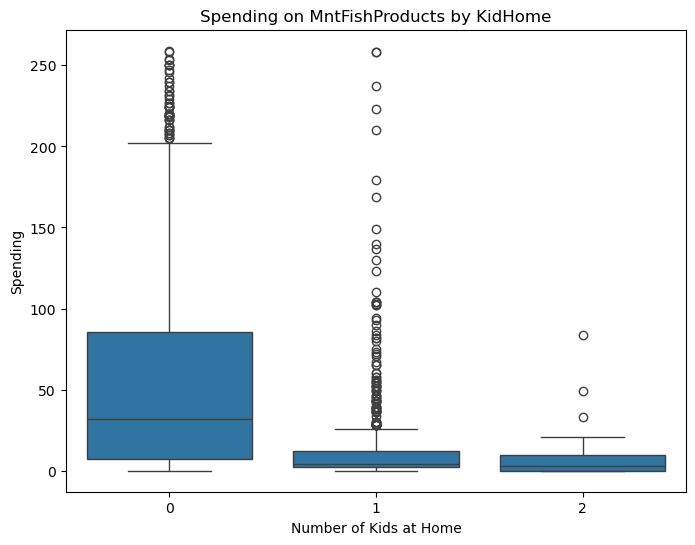

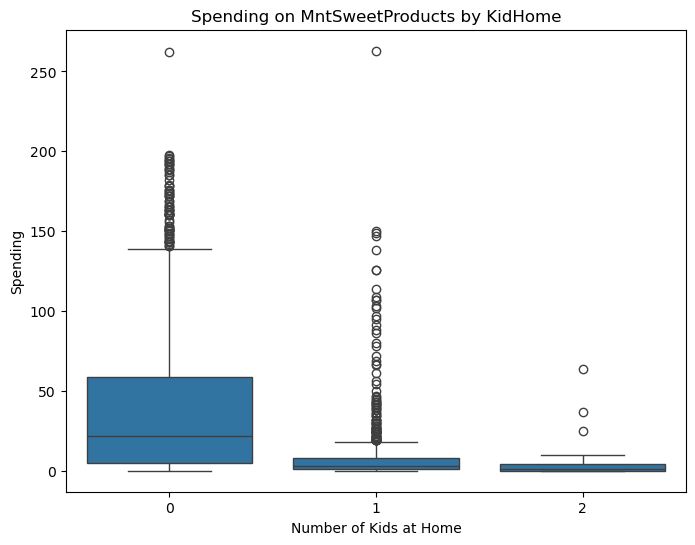

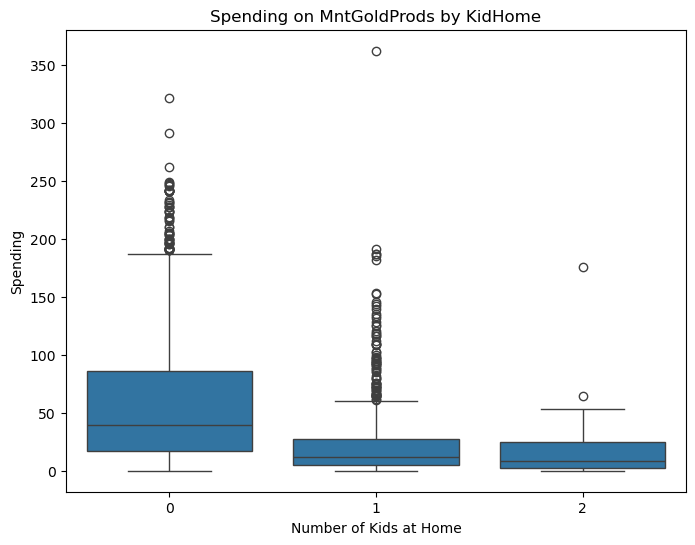

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in mnt_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Kidhome', y=col, data=df)
    plt.title(f'Spending on {col} by KidHome')
    plt.xlabel('Number of Kids at Home')
    plt.ylabel('Spending')
    plt.show()


In [98]:
from scipy.stats import shapiro

stat, p_value = shapiro(df['MntWines'])
print(f"Shapiro-Wilk Test: Statistic={stat}, P-Value={p_value}")


Shapiro-Wilk Test: Statistic=0.8382104618145217, P-Value=6.098078953240608e-43


In [99]:
from scipy.stats import kruskal

mnt_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
kruskal_results = []

for col in mnt_columns:
    groups = [group[col].dropna() for _, group in df.groupby('Kidhome')]
    stat, p_value = kruskal(*groups)
    kruskal_results.append({'Product': col, 'Statistic': stat, 'P-Value': p_value})

kruskal_df = pd.DataFrame(kruskal_results)
print(kruskal_df)


            Product   Statistic        P-Value
0          MntWines  763.166652  1.907512e-166
1         MntFruits  454.115845   2.454693e-99
2   MntMeatProducts  683.227771  4.354864e-149
3   MntFishProducts  459.653412  1.540032e-100
4  MntSweetProducts  431.576009   1.925132e-94
5      MntGoldProds  409.169970   1.412115e-89


In [100]:
import pandas as pd

# Assuming `df` is your DataFrame
# Group by Kidhome and count customers
kidhome_counts = df.groupby('Kidhome').size().reset_index(name='Total Customers')

# Group by Education and count customers
education_counts = df.groupby('Education').size().reset_index(name='Total Customers')

# Convert to CSV if needed for Canva
kidhome_counts.to_csv('total_customers_by_kidhome.csv', index=False)
education_counts.to_csv('total_customers_by_education.csv', index=False)

print("Kidhome Counts:")
print(kidhome_counts)
print("\nEducation Counts:")
print(education_counts)


Kidhome Counts:
   Kidhome  Total Customers
0        0             1291
1        1              898
2        2               48

Education Counts:
    Education  Total Customers
0       Basic               54
1  Graduation             1127
2      Master              571
3         PhD              485


In [147]:
import pandas as pd

# Assuming `df` is your DataFrame containing product spending columns
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Compute the correlation matrix
correlation_matrix = df[product_columns].corr(method='spearman')

# Display the correlation matrix
print(correlation_matrix)

# Save the correlation matrix to a CSV file for further use
correlation_matrix.to_csv('product_correlation_matrix.csv', index=True)


                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
MntWines          1.000000   0.516881         0.823333         0.524336   
MntFruits         0.516881   1.000000         0.712826         0.704881   
MntMeatProducts   0.823333   0.712826         1.000000         0.726332   
MntFishProducts   0.524336   0.704881         0.726332         1.000000   
MntSweetProducts  0.504665   0.690872         0.695338         0.700817   
MntGoldProds      0.574816   0.567806         0.637422         0.564942   

                  MntSweetProducts  MntGoldProds  
MntWines                  0.504665      0.574816  
MntFruits                 0.690872      0.567806  
MntMeatProducts           0.695338      0.637422  
MntFishProducts           0.700817      0.564942  
MntSweetProducts          1.000000      0.542160  
MntGoldProds              0.542160      1.000000  


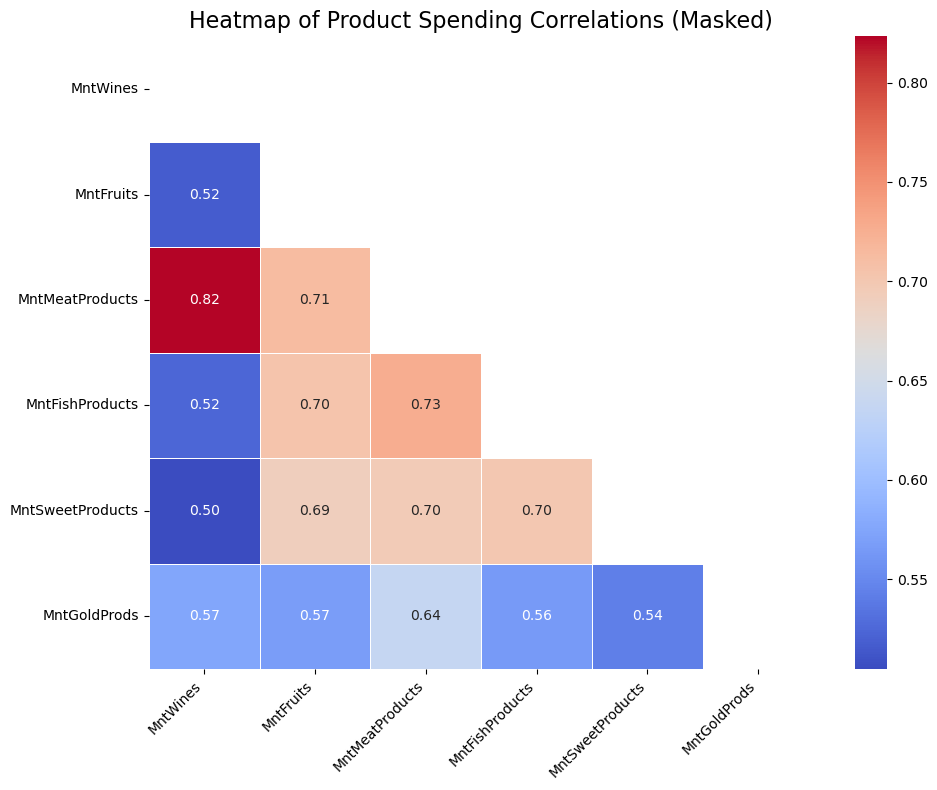

In [151]:
# Mask the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Product Spending Correlations (Masked)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()